# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [111]:
import pandas as pd 
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from scipy.stats import skew
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy.stats import zscore
import seaborn as sns
import os
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [112]:
base_dir = os.getcwd()
mc_path = os.path.join(base_dir, 'data/marketing_campaign.csv')
mc_df = pd.read_csv(mc_path, sep='\t')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [113]:
mc_df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [114]:
mc_df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [115]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [116]:
print("Data yang terduplikasi : ", mc_df.duplicated().sum())

Data yang terduplikasi :  0


In [117]:
missing_data = mc_df.isnull().sum()[mc_df.isnull().sum() > 0]

if not missing_data.empty:
    print("Jumlah data yang hilang per kolom:")
    print(missing_data)
else:
    print("Tidak ada data yang hilang dalam dataframe.")


Jumlah data yang hilang per kolom:
Income    24
dtype: int64


In [118]:
mc_df['Income'].fillna(mc_df['Income'].median(), inplace=True)

In [119]:
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

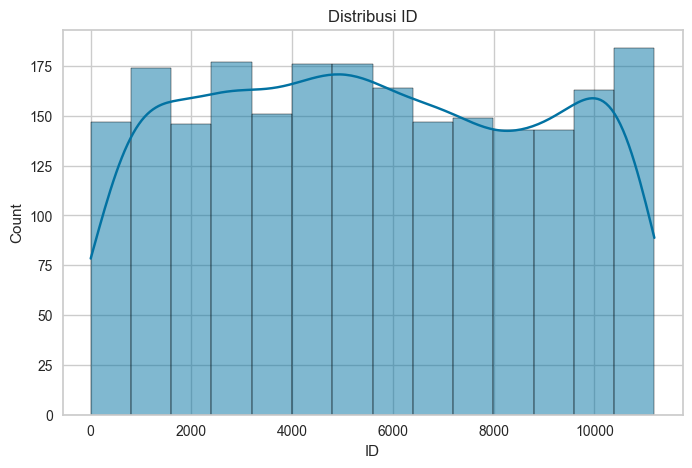

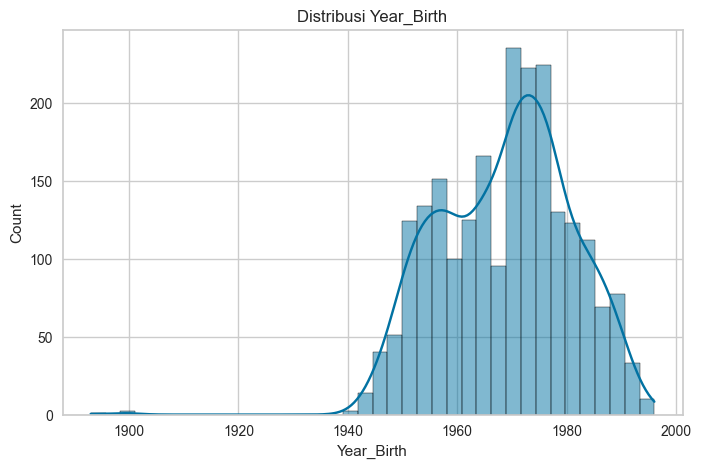

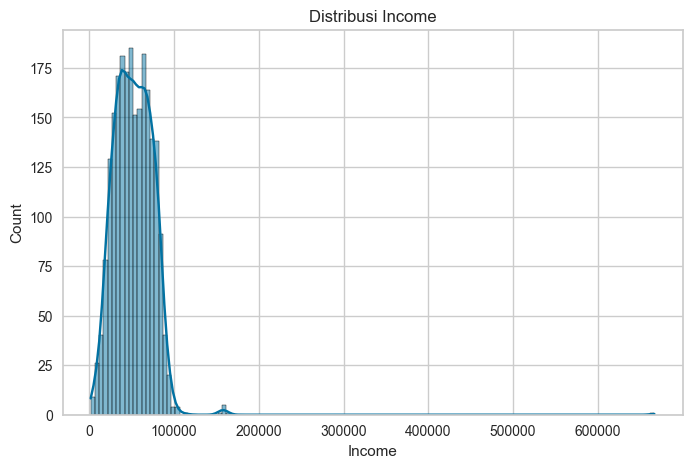

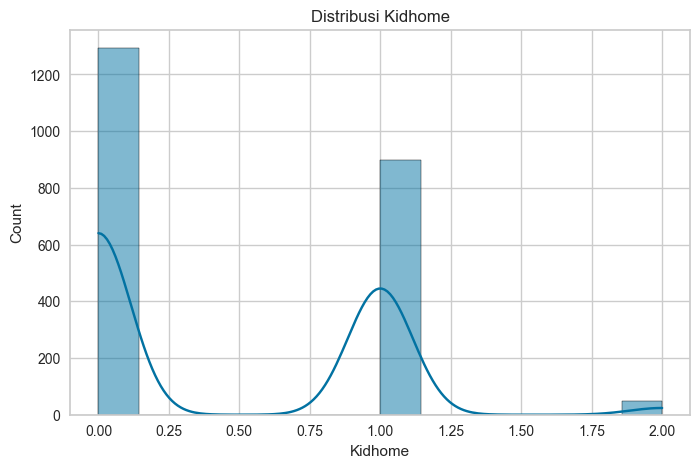

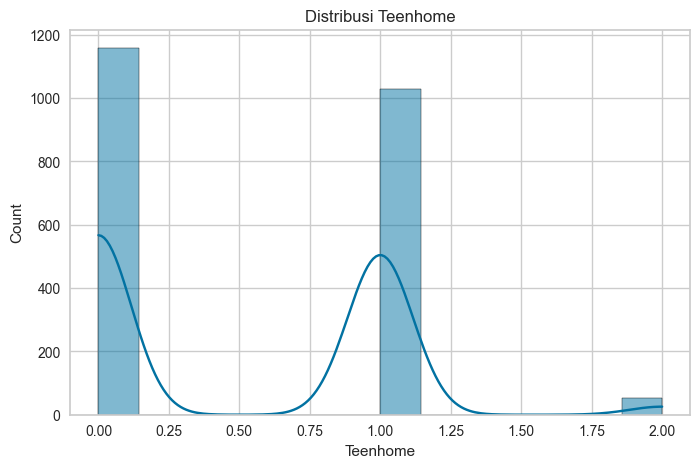

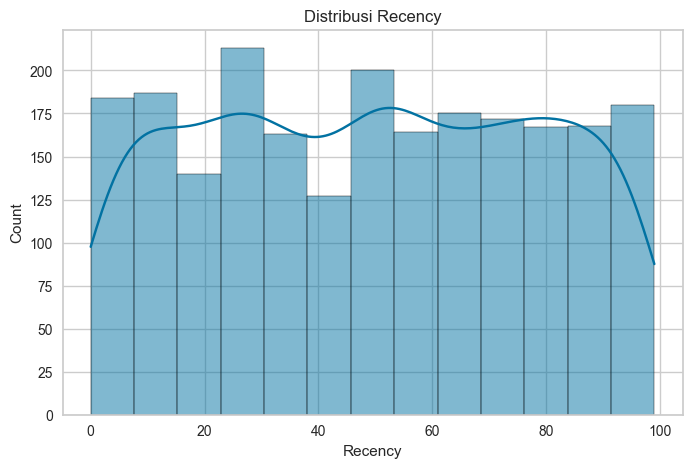

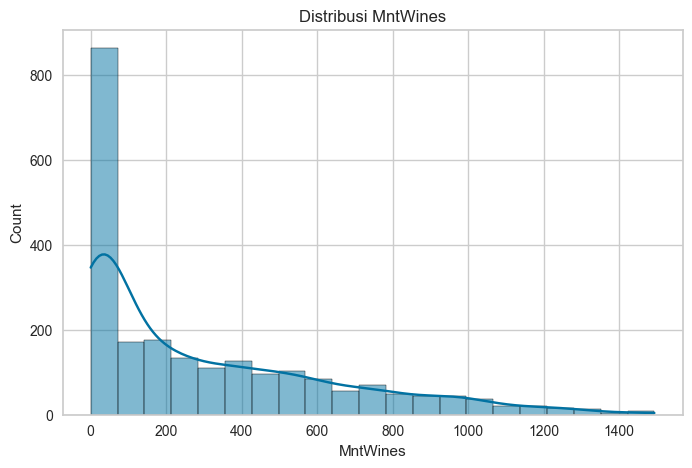

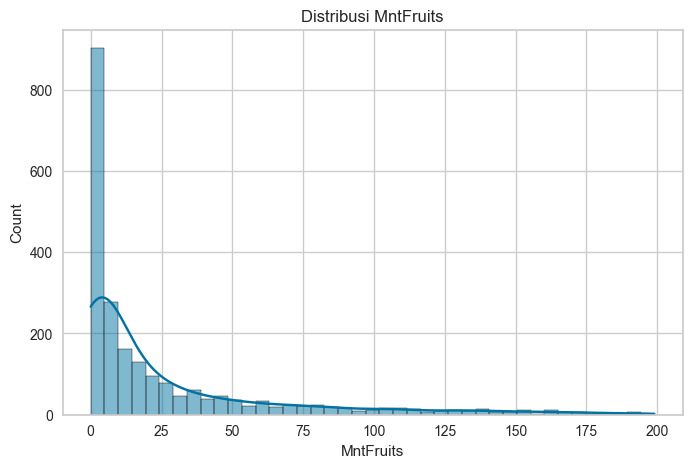

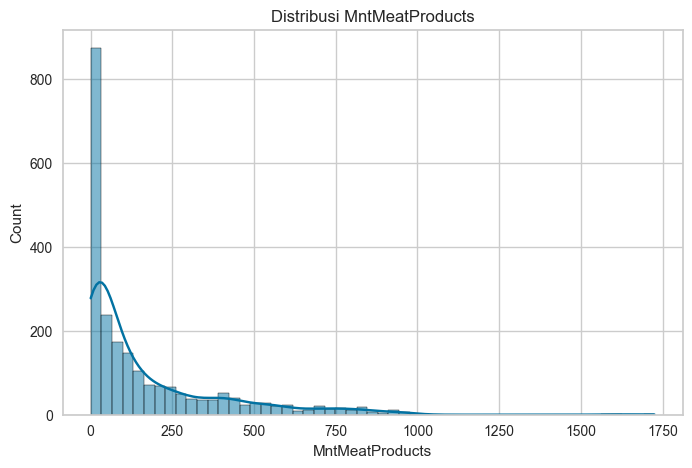

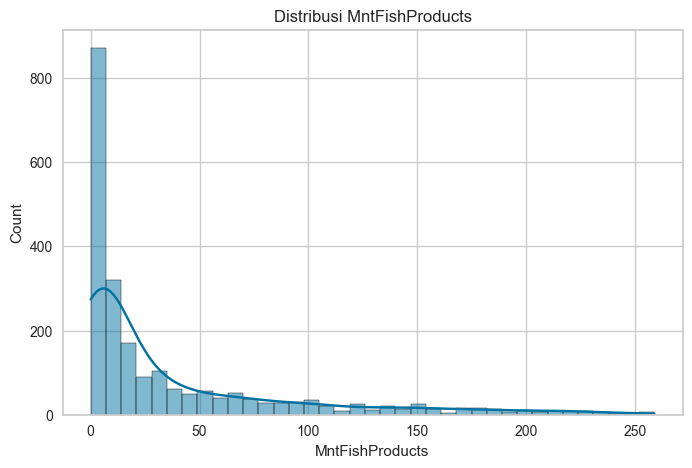

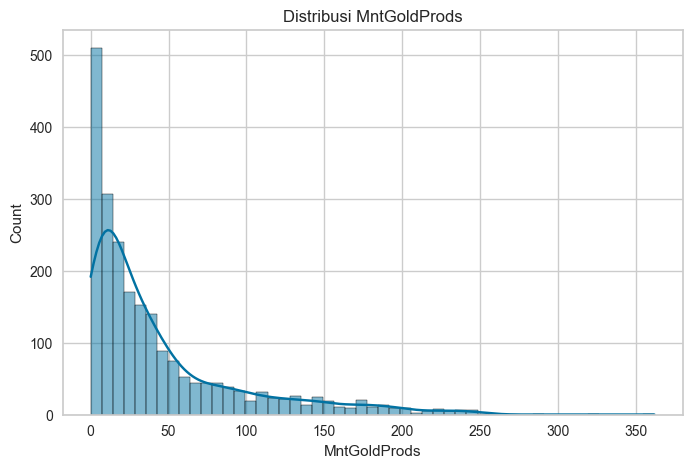

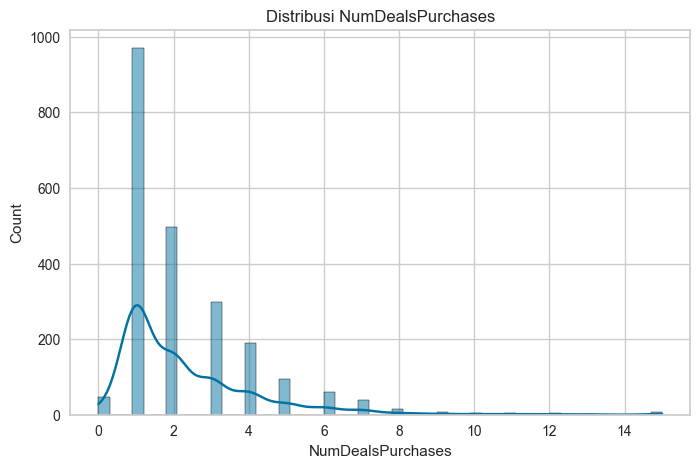

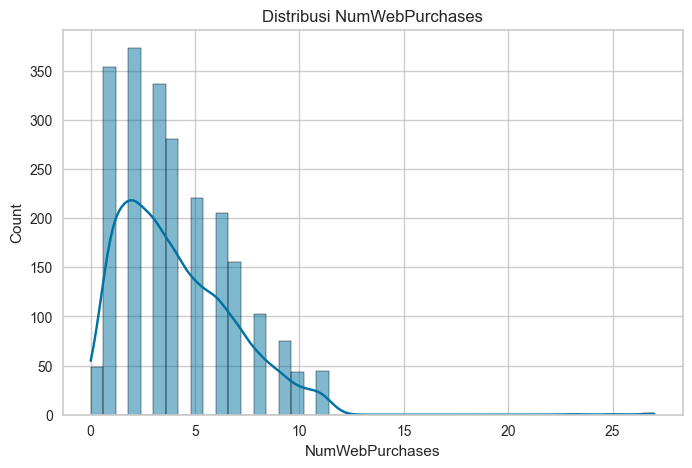

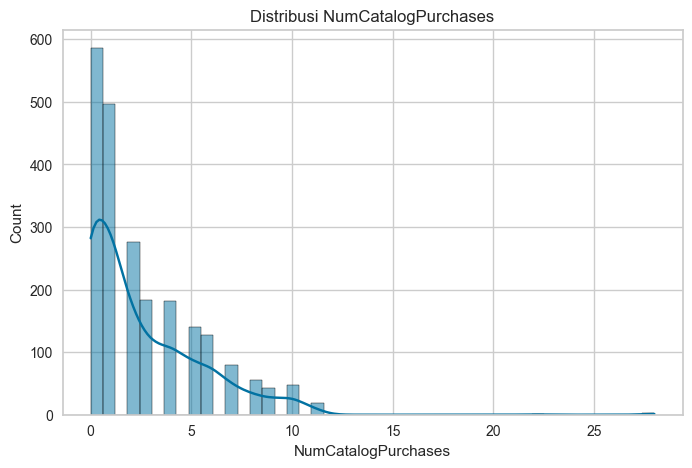

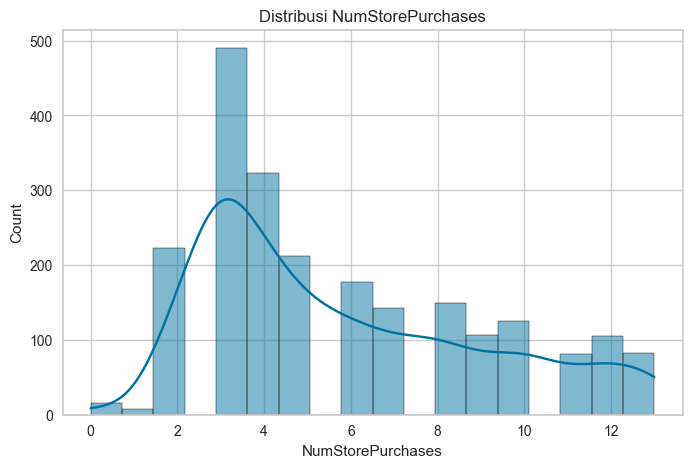

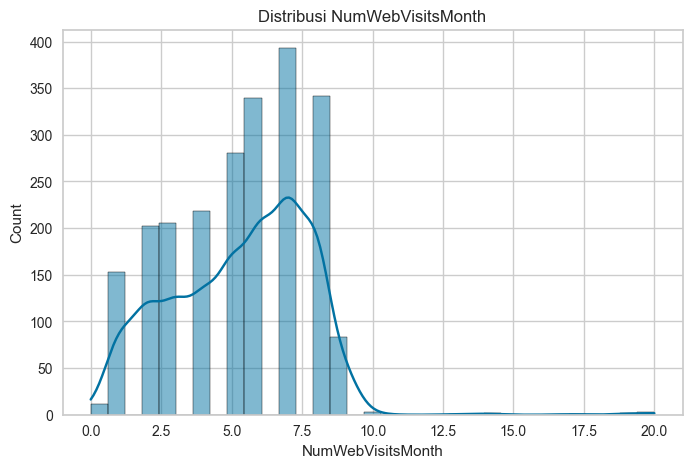

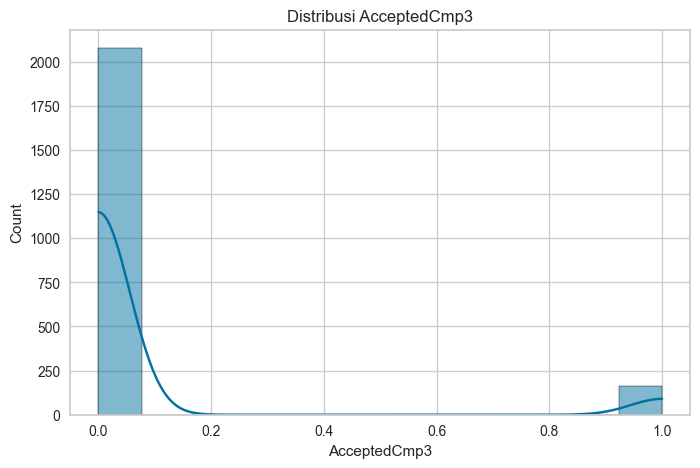

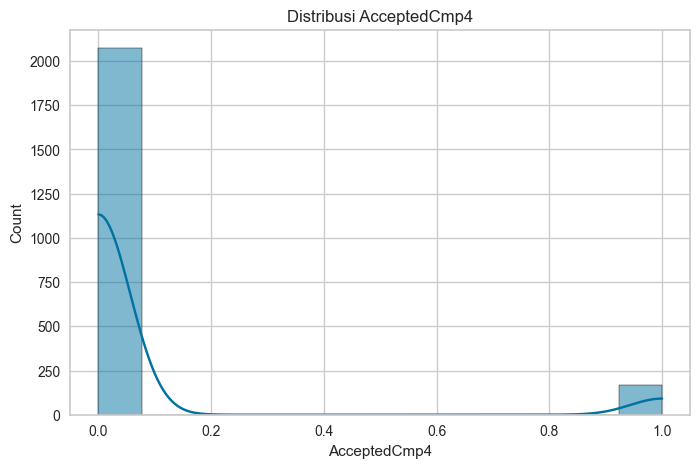

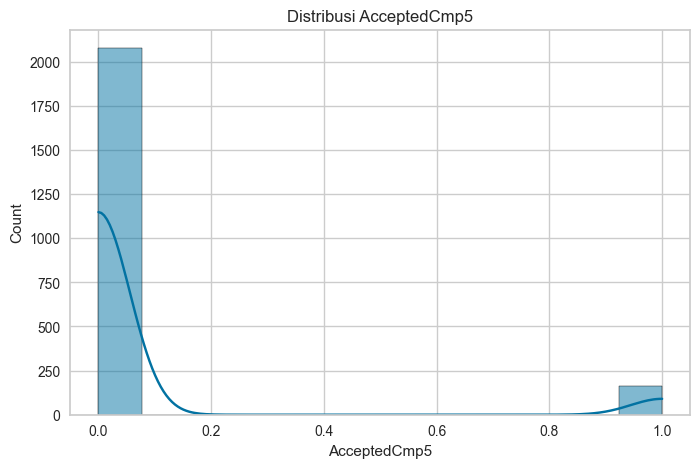

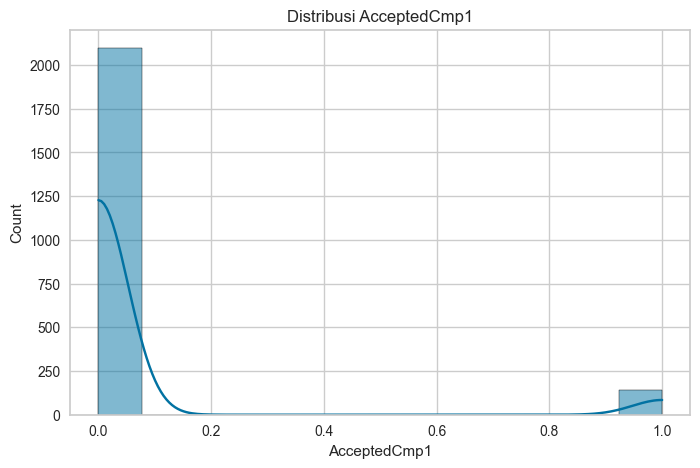

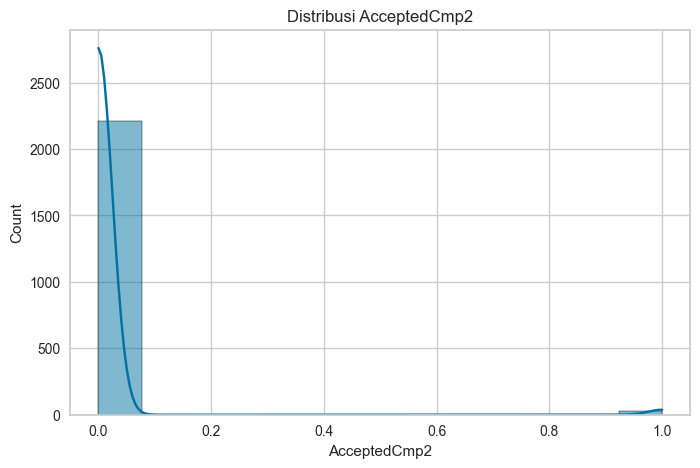

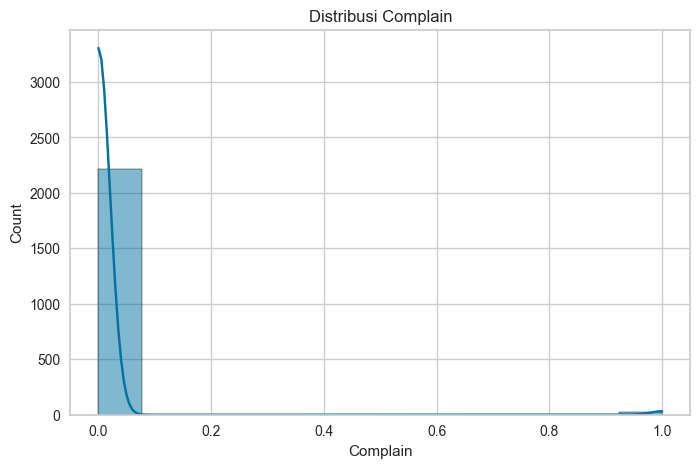

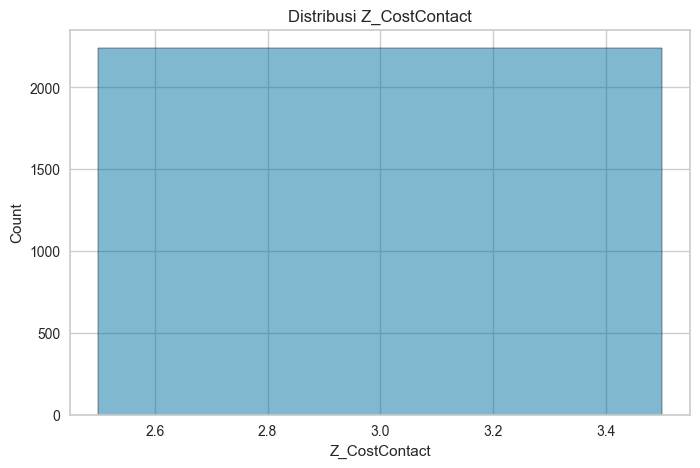

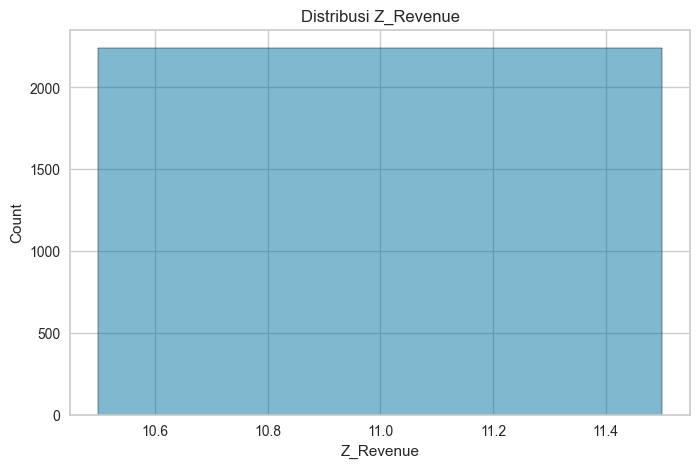

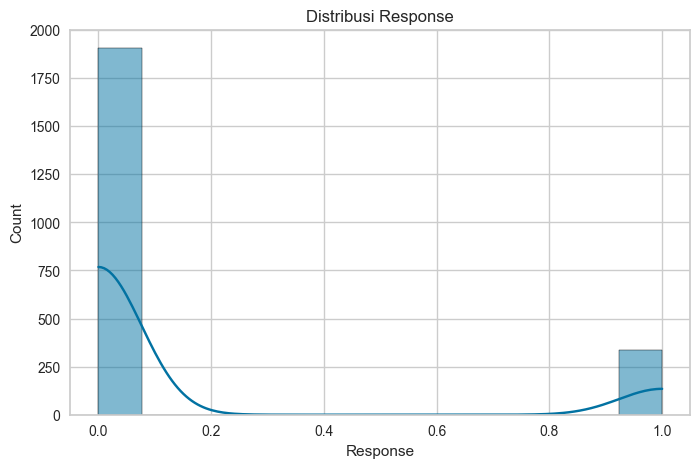

In [120]:
numeric_features = mc_df.select_dtypes(include=['int64', 'float64']).columns

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(mc_df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()

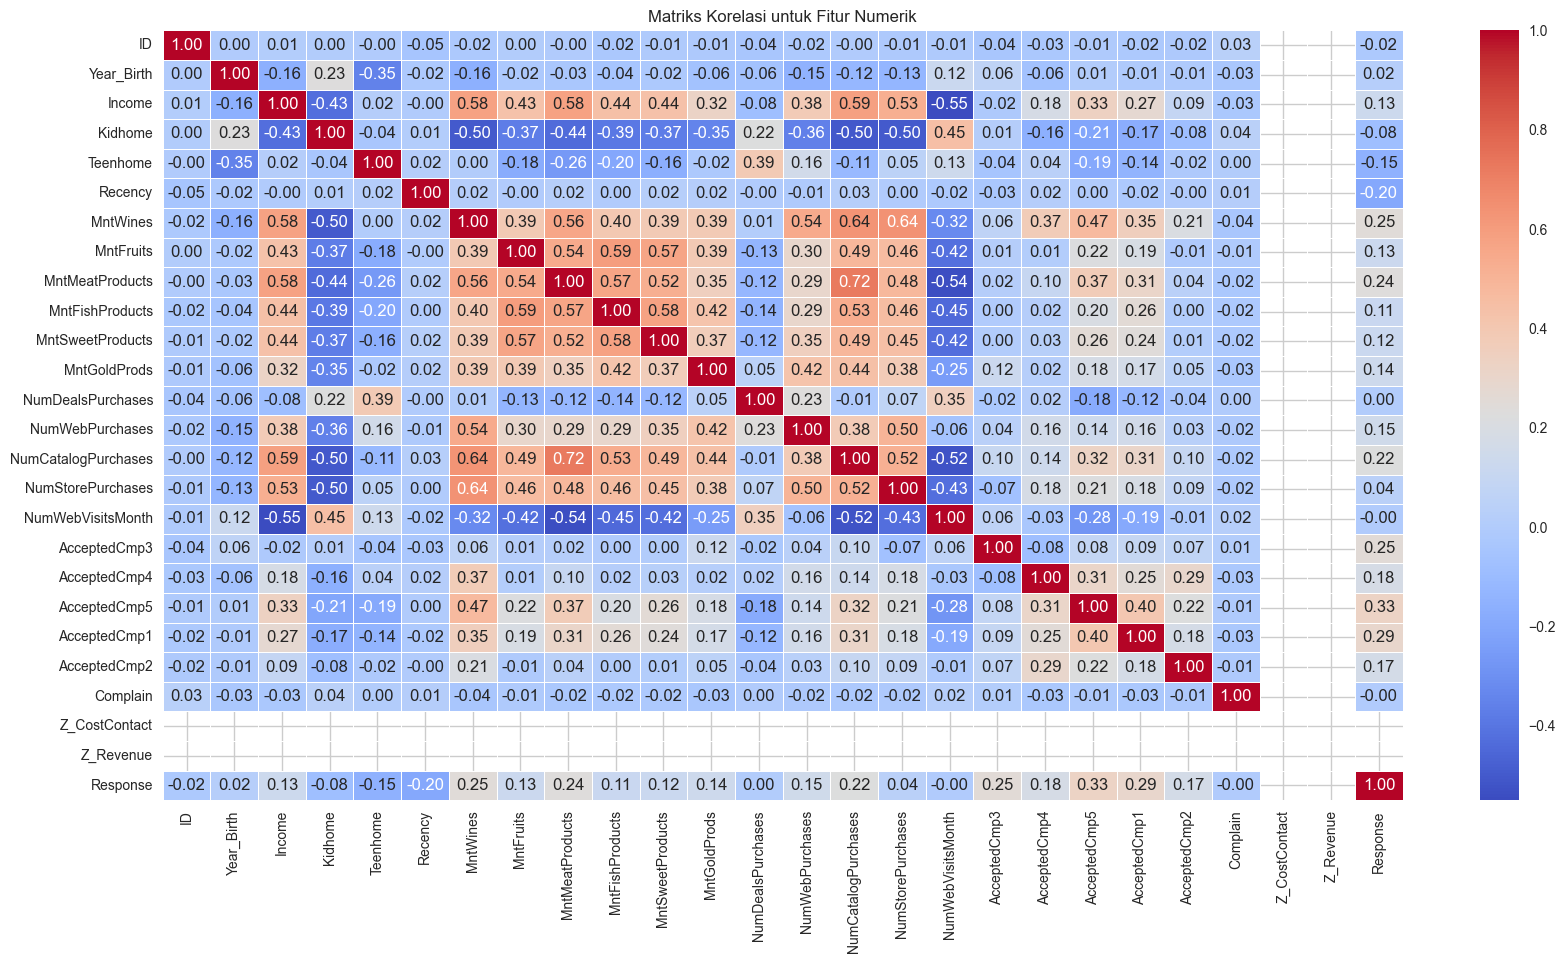

In [121]:
# Memastikan hanya kolom numerik yang digunakan
numeric_df = mc_df.select_dtypes(include=['number'])

# Membuat heatmap korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik")
plt.show()

In [122]:
df_temp = mc_df.copy()
df_temp_categorical = df_temp.select_dtypes(include=['object'])
#label encoding
df_temp_categorical = df_temp_categorical.apply(LabelEncoder().fit_transform)
# masukkan kembali ke df_temp
df_temp[df_temp_categorical.columns] = df_temp_categorical

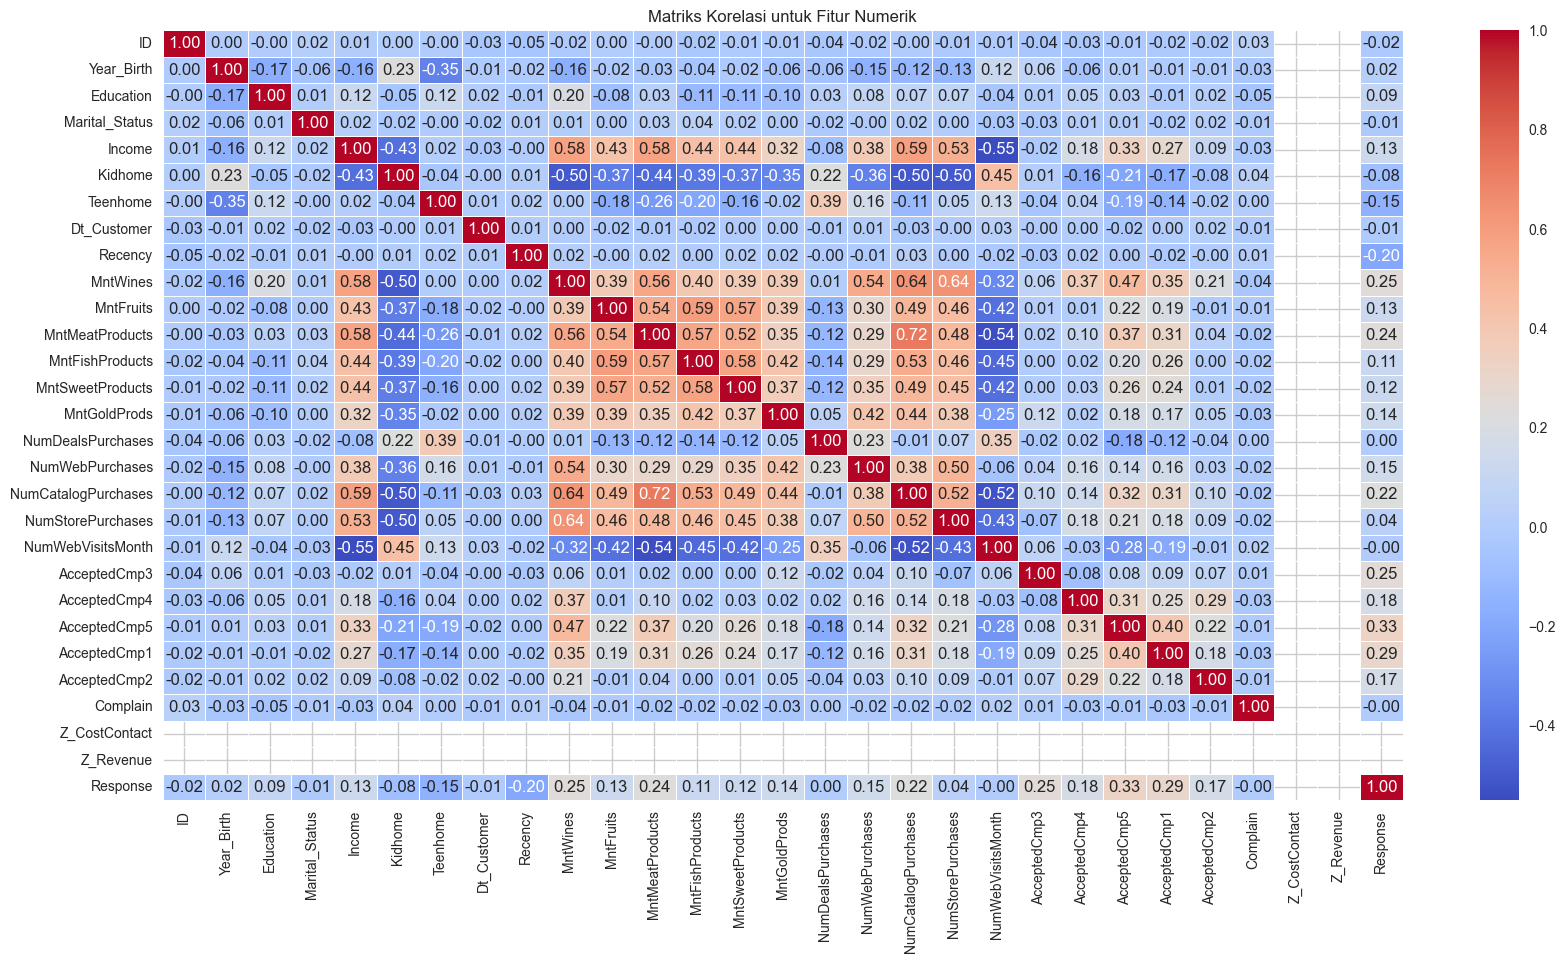

In [123]:
# Membuat heatmap korelasi
plt.figure(figsize=(20, 10))
sns.heatmap(df_temp.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi untuk Fitur Numerik")
plt.show()

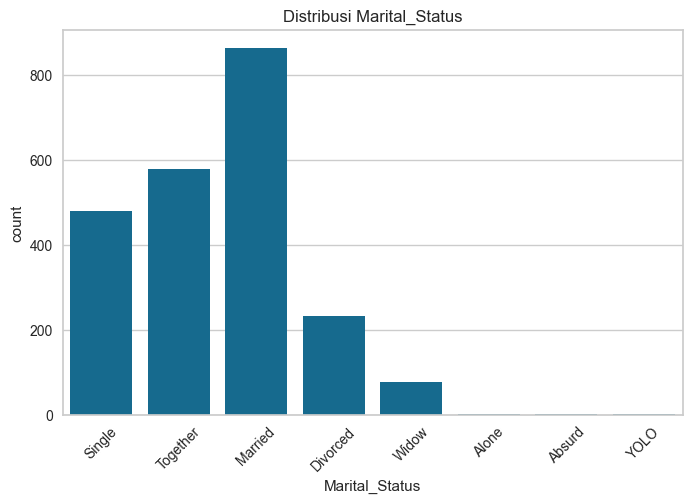

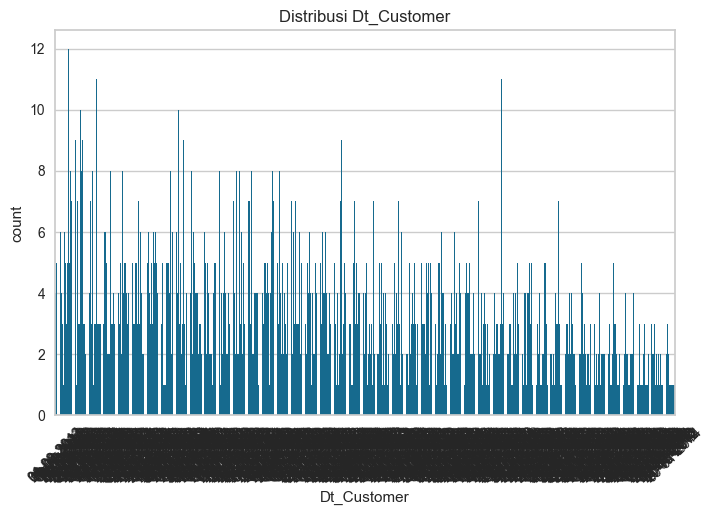

In [124]:
categorical_features = mc_df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=mc_df[feature])
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [125]:
missing_values = mc_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [126]:
duplicate_rows = mc_df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_rows}")

Jumlah data duplikat: 0


In [127]:
selected_features = [
    'Marital_Status', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'NumStorePurchases'
]

In [128]:
mc_df_selected = mc_df[selected_features]

In [129]:
mc_df_selected.head()

Marital_Status  MntWines  MntMeatProducts  NumCatalogPurchases  \
0         Single       635              546                   10   
1         Single        11                6                    1   
2       Together       426              127                    2   
3       Together        11               20                    0   
4        Married       173              118                    3   

   NumStorePurchases  
0                  4  
1                  2  
2                 10  
3                  4  
4                  6

##### Numeric

In [130]:
mc_df_numeric = mc_df_selected.select_dtypes(include=['int64', 'float64'])
numeric_features = mc_df_numeric.columns

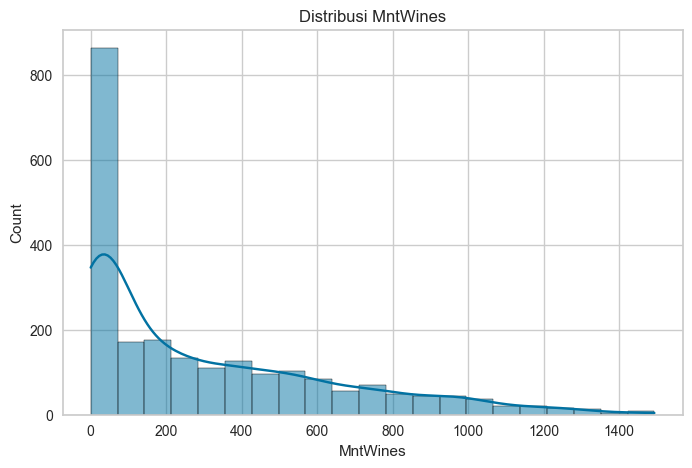

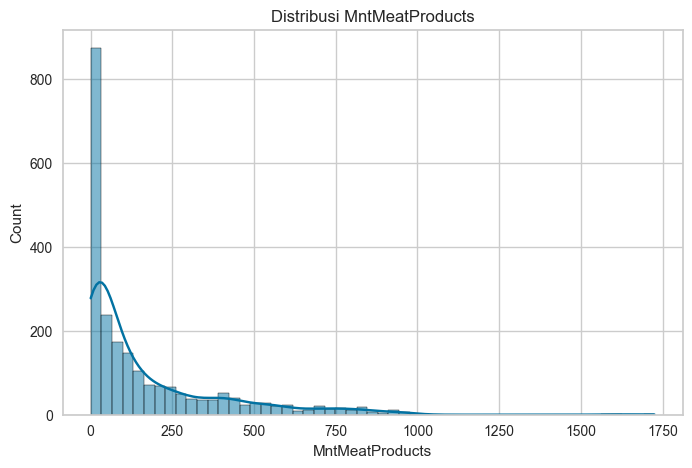

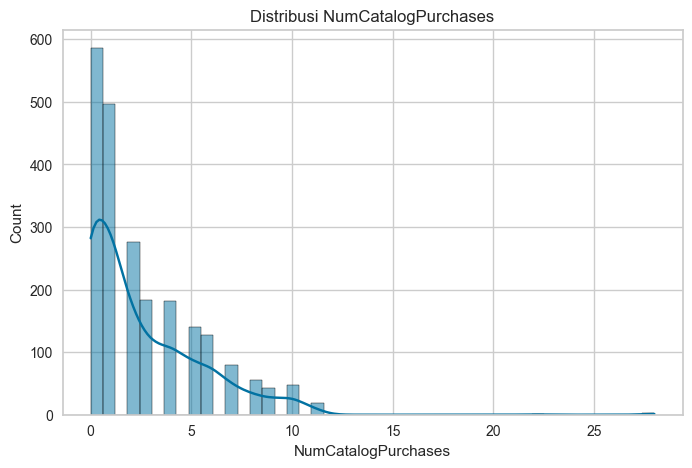

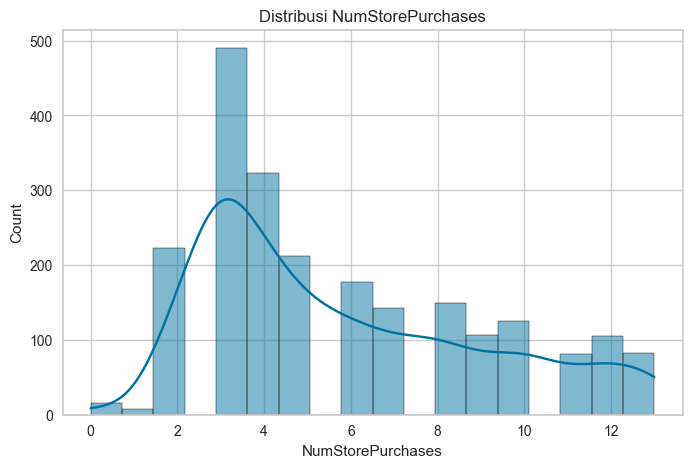

In [131]:
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(mc_df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()

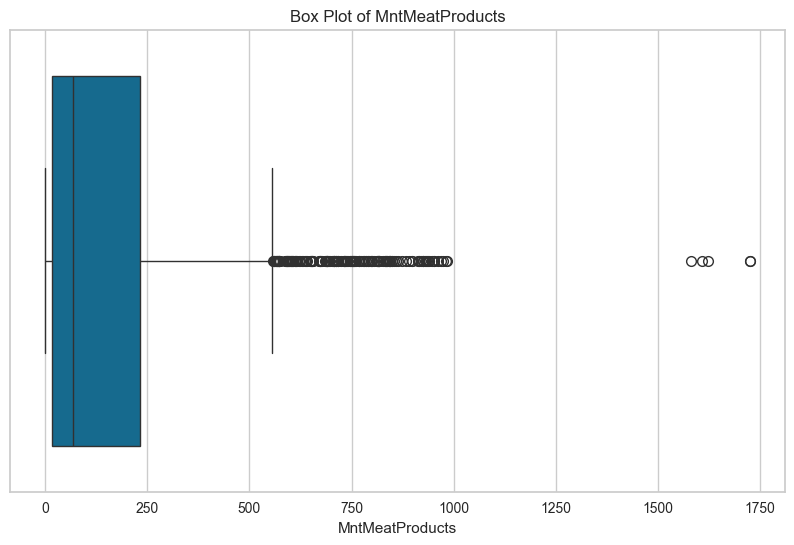

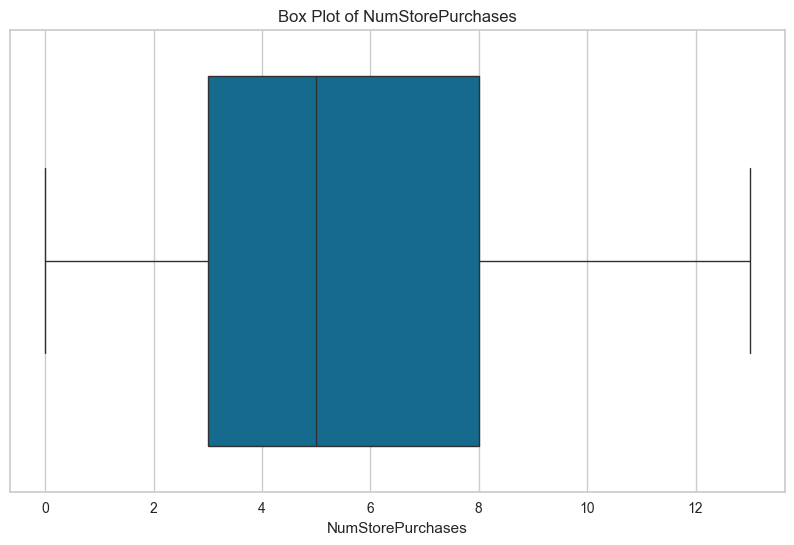

In [132]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=mc_df_numeric[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [133]:
Q1 = mc_df_numeric[numeric_features].quantile(0.25)
Q3 = mc_df_numeric[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Menggunakan 1.0 * IQR daripada 1.5 untuk lebih ketat
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [134]:
# Mengganti nilai outlier dengan batas atas/bawah
mc_df_numeric_outlier_removed = mc_df_numeric.copy()
for feature in numeric_features:
    mc_df_numeric_outlier_removed[feature] = np.where(mc_df_numeric_outlier_removed[feature] < lower_bound[feature], lower_bound[feature], mc_df_numeric_outlier_removed[feature])
    mc_df_numeric_outlier_removed[feature] = np.where(mc_df_numeric_outlier_removed[feature] > upper_bound[feature], upper_bound[feature], mc_df_numeric_outlier_removed[feature])

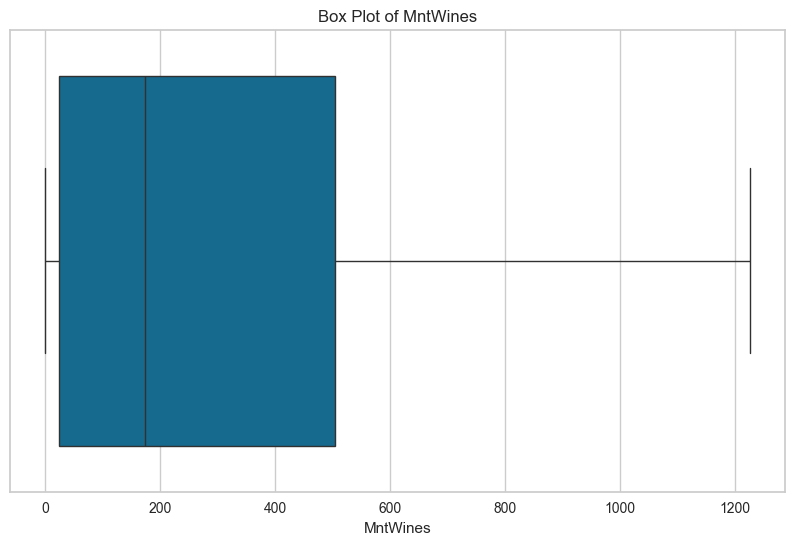

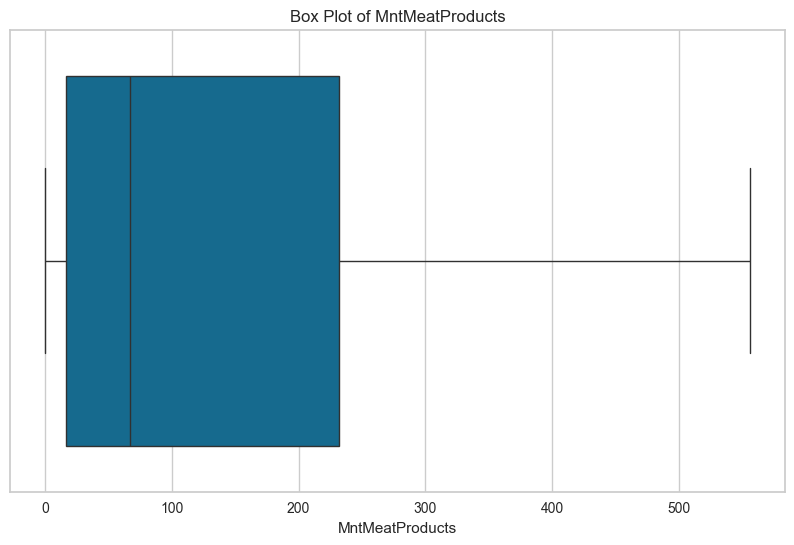

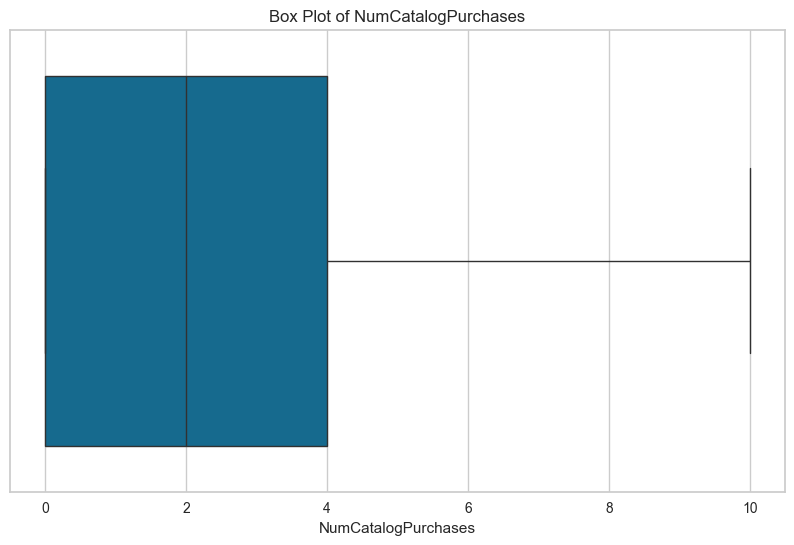

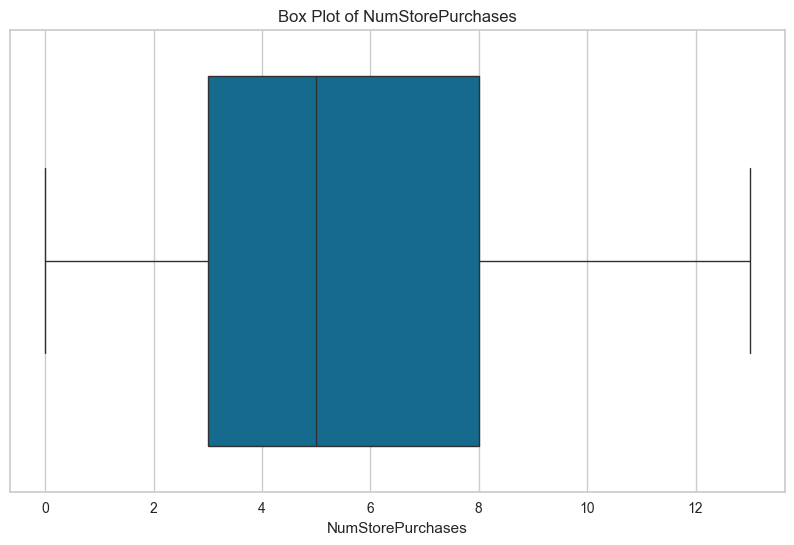

In [135]:
for feature in mc_df_numeric_outlier_removed.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=mc_df_numeric_outlier_removed[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

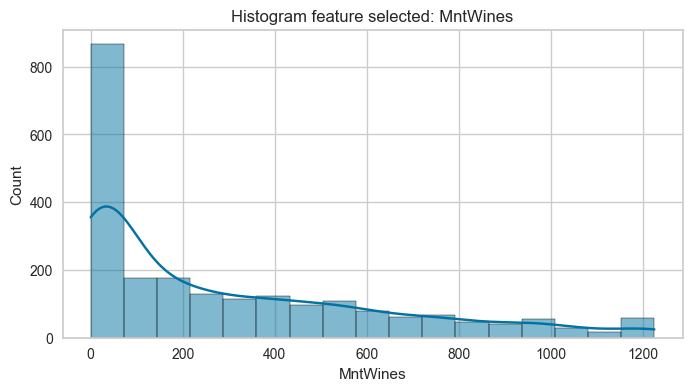

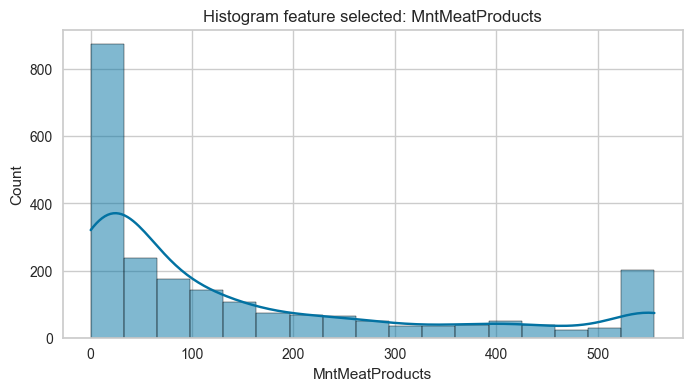

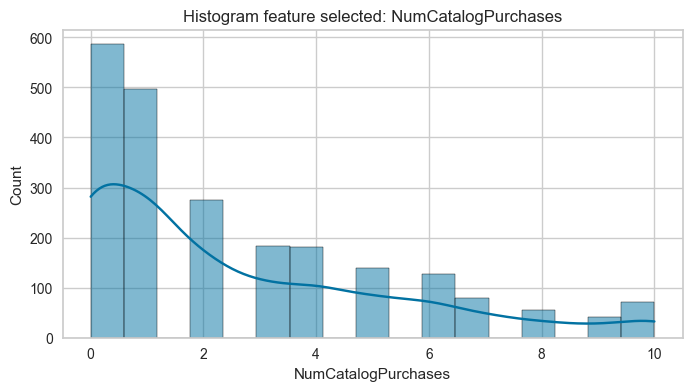

In [136]:
for feature in mc_df_numeric_outlier_removed.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(mc_df_numeric_outlier_removed[feature], kde=True)
    plt.title(f'Histogram feature selected: {feature}')
    plt.show()

##### Categorical

In [137]:
mc_df_categorical = mc_df_selected.select_dtypes(include=['object'])

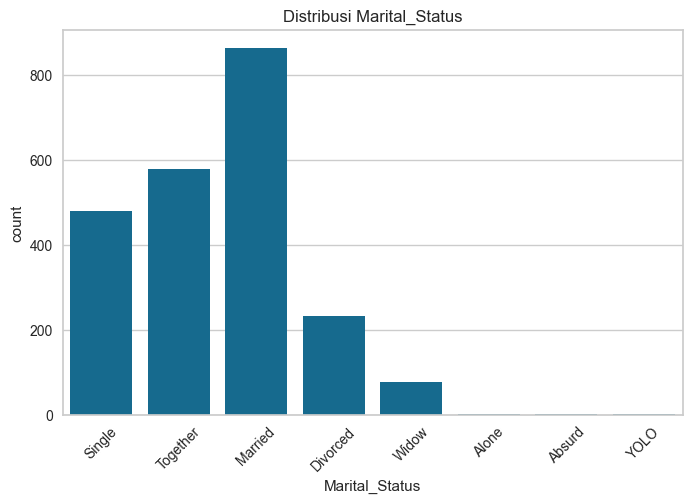

In [138]:
for feature in mc_df_categorical.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=mc_df[feature])
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [139]:
mc_df_categorical['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [140]:
# Masukkan YOLO, Alone, Absurd ke Single dan Widow ke Divorced
mc_df_categorical['Marital_Status'] = mc_df_categorical['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')
mc_df_categorical['Marital_Status'] = mc_df_categorical['Marital_Status'].replace('Widow', 'Divorced')

mc_df_categorical['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      487
Divorced    309
Name: count, dtype: int64

In [141]:
for feature in mc_df_categorical.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=mc_df_categorical[feature])
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [142]:
mc_df_categorical.value_counts()

Marital_Status
Married           864
Together          580
Single            487
Divorced          309
Name: count, dtype: int64

In [248]:
encoder = LabelEncoder()
# Copy dataset sebelum encoding
mc_df_categorical_encoded = mc_df_categorical.copy()

# # Terapkan Frequency Encoding
# for col in mc_df_categorical_encoded.columns:
#     freq_map = mc_df_categorical_encoded[col].value_counts() / len(mc_df_categorical_encoded)
#     mc_df_categorical_encoded[col] = mc_df_categorical_encoded[col].map(freq_map)

mc_df_categorical_encoded = mc_df_categorical_encoded.apply(encoder.fit_transform)

In [249]:
mc_df_categorical_encoded.head()

Marital_Status
0               2
1               2
2               3
3               3
4               1

In [250]:
mc_df_categorical_encoded['Marital_Status'].value_counts()

Marital_Status
1    864
3    580
2    487
0    309
Name: count, dtype: int64

In [251]:
for feature in mc_df_categorical_encoded.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=mc_df_categorical_encoded[feature])
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
    plt.show()

##### Normalisasi Data Numerik

In [252]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(mc_df_numeric_outlier_removed), columns=mc_df_numeric_outlier_removed.columns)

df_scaled.head()

MntWines  MntMeatProducts  NumCatalogPurchases  NumStorePurchases
0  0.518367         0.982014                  1.0           0.307692
1  0.008980         0.010791                  0.1           0.153846
2  0.347755         0.228417                  0.2           0.769231
3  0.008980         0.035971                  0.0           0.307692
4  0.141224         0.212230                  0.3           0.461538

##### Mengetahui Nilai Skewness

In [439]:
skewness_values = mc_df_preprocessed.skew()
skewness_values

Income                 0.090027
MntFruits              1.233953
MntFishProducts        1.230822
MntMeatProducts        1.213585
MntSweetProducts       1.213346
NumCatalogPurchases    1.071866
NumStorePurchases      0.702237
NumWebPurchases        0.710853
Marital_Status         0.080276
Education             -0.283625
dtype: float64

##### Mengurangi Skewness

In [783]:
mc_df_transformed = mc_df_preprocessed.copy()
skewed_features = ['MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntSweetProducts','NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
for feature in skewed_features:
    mc_df_transformed[feature] = np.sqrt(mc_df_transformed[feature])


In [443]:
mc_df_transformed.skew()

Income                 0.090027
MntFruits              0.552159
MntFishProducts        0.564950
MntMeatProducts        0.651985
MntSweetProducts       0.538045
NumCatalogPurchases    0.069587
NumStorePurchases      0.145900
NumWebPurchases       -0.127192
Marital_Status         0.080276
Education             -0.283625
dtype: float64

In [459]:
mc_df_transformed.head()

Income  MntFruits  MntFishProducts  MntMeatProducts  MntSweetProducts  \
0  0.487595   1.000000         1.000000         0.990966          1.000000   
1  0.385647   0.111111         0.128831         0.103882          0.111111   
2  0.604074   0.777778         0.959772         0.477930          0.509175   
3  0.215376   0.222222         0.288076         0.189661          0.192450   
4  0.488935   0.728604         0.617853         0.460685          0.577350   

   NumCatalogPurchases  NumStorePurchases  NumWebPurchases  Marital_Status  \
0             1.000000           0.554700         0.816497               2   
1             0.316228           0.392232         0.288675               2   
2             0.447214           0.877058         0.816497               3   
3             0.000000           0.554700         0.408248               3   
4             0.547723           0.679366         0.645497               1   

   Education  
0          2  
1          2  
2          2  
3          2  
4          4

In [466]:
mc_df_scaled = mc_df_transformed.copy()
mc_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   MntFruits            2240 non-null   float64
 2   MntFishProducts      2240 non-null   float64
 3   MntMeatProducts      2240 non-null   float64
 4   MntSweetProducts     2240 non-null   float64
 5   NumCatalogPurchases  2240 non-null   float64
 6   NumStorePurchases    2240 non-null   float64
 7   NumWebPurchases      2240 non-null   float64
 8   Marital_Status       2240 non-null   int64  
 9   Education            2240 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 175.1 KB


In [469]:
mc_df_scaled = scaler.fit_transform(mc_df_scaled)

In [470]:
mc_df_scaled = pd.DataFrame(mc_df_scaled, columns=mc_df_transformed.columns)

In [472]:
mc_df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2240 non-null   float64
 1   MntFruits            2240 non-null   float64
 2   MntFishProducts      2240 non-null   float64
 3   MntMeatProducts      2240 non-null   float64
 4   MntSweetProducts     2240 non-null   float64
 5   NumCatalogPurchases  2240 non-null   float64
 6   NumStorePurchases    2240 non-null   float64
 7   NumWebPurchases      2240 non-null   float64
 8   Marital_Status       2240 non-null   float64
 9   Education            2240 non-null   float64
dtypes: float64(10)
memory usage: 175.1 KB


In [533]:
mc_df_transformed.head()

Income  MntFruits  MntFishProducts  MntMeatProducts  MntSweetProducts  \
0  0.487595   1.000000         1.000000         0.990966          1.000000   
1  0.385647   0.111111         0.128831         0.103882          0.111111   
2  0.604074   0.777778         0.959772         0.477930          0.509175   
3  0.215376   0.222222         0.288076         0.189661          0.192450   
4  0.488935   0.728604         0.617853         0.460685          0.577350   

   NumCatalogPurchases  NumStorePurchases  NumWebPurchases  Marital_Status  \
0             1.000000           0.554700         0.816497               2   
1             0.316228           0.392232         0.288675               2   
2             0.447214           0.877058         0.816497               3   
3             0.000000           0.554700         0.408248               3   
4             0.547723           0.679366         0.645497               1   

   Education  
0          2  
1          2  
2          2  
3          2  
4          4

##### Melakukan Binning

In [253]:
mc_df_selected.describe()

MntWines  MntMeatProducts  NumCatalogPurchases  NumStorePurchases
count  2240.000000      2240.000000          2240.000000        2240.000000
mean    303.935714       166.950000             2.662054           5.790179
std     336.597393       225.715373             2.923101           3.250958
min       0.000000         0.000000             0.000000           0.000000
25%      23.750000        16.000000             0.000000           3.000000
50%     173.500000        67.000000             2.000000           5.000000
75%     504.250000       232.000000             4.000000           8.000000
max    1493.000000      1725.000000            28.000000          13.000000

In [254]:
# Tentukan jumlah bins untuk setiap fitur
binning_config = {
    "MntWines": [0, 100, 300, 500, np.inf],
    "MntMeatProducts": [0, 50, 150, 250, np.inf],
    "NumCatalogPurchases": [0, 2, 5, 8, np.inf],
    "NumStorePurchases": [0, 2, 5, 8, np.inf]
}

mc_binning_df = mc_df_numeric_outlier_removed.copy()

# Binning setiap fitur sesuai dengan rentang yang ditentukan
for feature, bins in binning_config.items():
    labels = [f"Very Low", "Low", "Medium", "High", "Very High"][:len(bins) - 1]  # Label bin sesuai jumlah bins
    mc_binning_df[f"{feature}_Bin"] = pd.cut(mc_df_selected[feature], bins=bins, labels=labels, include_lowest=True)

# Menampilkan hasil binning (5 sampel pertama)
mc_binning_df[[f"{col}_Bin" for col in binning_config.keys()]].head()

MntWines_Bin MntMeatProducts_Bin NumCatalogPurchases_Bin  \
0         High                High                    High   
1     Very Low            Very Low                Very Low   
2       Medium                 Low                Very Low   
3     Very Low            Very Low                Very Low   
4          Low                 Low                     Low   

  NumStorePurchases_Bin  
0                   Low  
1              Very Low  
2                  High  
3                   Low  
4                Medium

In [255]:
mc_binning_df

MntWines  MntMeatProducts  NumCatalogPurchases  NumStorePurchases  \
0        635.0            546.0                 10.0                4.0   
1         11.0              6.0                  1.0                2.0   
2        426.0            127.0                  2.0               10.0   
3         11.0             20.0                  0.0                4.0   
4        173.0            118.0                  3.0                6.0   
...        ...              ...                  ...                ...   
2235     709.0            182.0                  3.0                4.0   
2236     406.0             30.0                  2.0                5.0   
2237     908.0            217.0                  3.0               13.0   
2238     428.0            214.0                  5.0               10.0   
2239      84.0             61.0                  1.0                4.0   

     MntWines_Bin MntMeatProducts_Bin NumCatalogPurchases_Bin  \
0            High                High                    High   
1        Very Low            Very Low                Very Low   
2          Medium                 Low                Very Low   
3        Very Low            Very Low                Very Low   
4             Low                 Low                     Low   
...           ...                 ...                     ...   
2235         High              Medium                     Low   
2236       Medium            Very Low                Very Low   
2237         High              Medium                     Low   
2238       Medium              Medium                     Low   
2239     Very Low                 Low                Very Low   

     NumStorePurchases_Bin  
0                      Low  
1                 Very Low  
2                     High  
3                      Low  
4                   Medium  
...                    ...  
2235                   Low  
2236                   Low  
2237                  High  
2238                  High  
2239                   Low  

[2240 rows x 8 columns]

In [256]:
mc_binning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   MntWines                 2240 non-null   float64 
 1   MntMeatProducts          2240 non-null   float64 
 2   NumCatalogPurchases      2240 non-null   float64 
 3   NumStorePurchases        2240 non-null   float64 
 4   MntWines_Bin             2240 non-null   category
 5   MntMeatProducts_Bin      2240 non-null   category
 6   NumCatalogPurchases_Bin  2240 non-null   category
 7   NumStorePurchases_Bin    2240 non-null   category
dtypes: category(4), float64(4)
memory usage: 79.7 KB


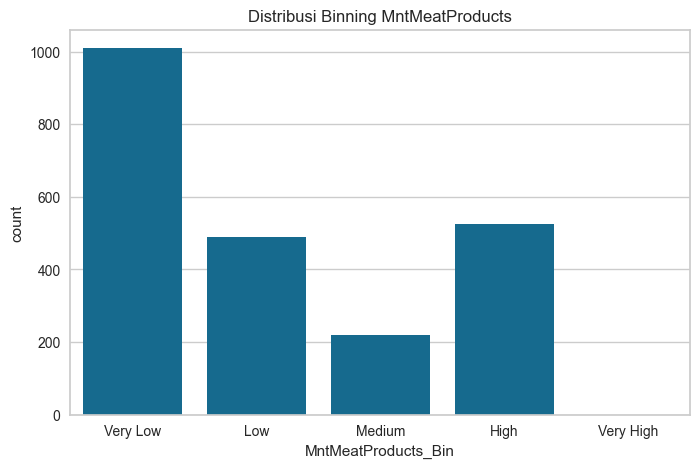

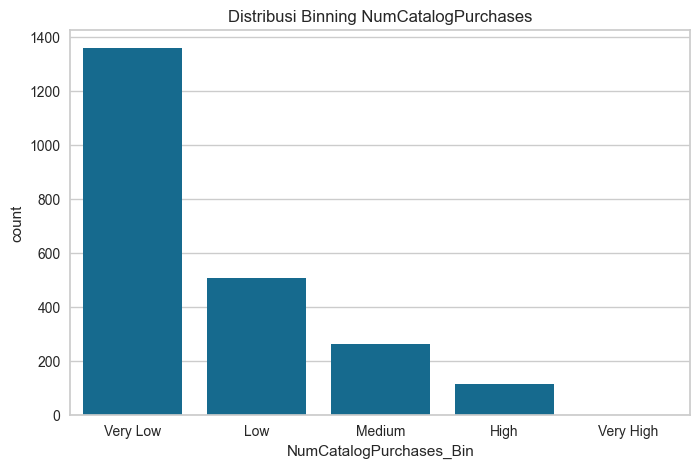

In [257]:
# Visualisasi distribusi data setelah binning
for feature in binning_config.keys():
    plt.figure(figsize=(8, 5))
    sns.countplot(x=f"{feature}_Bin", data=mc_binning_df, order=["Very Low", "Low", "Medium", "High", "Very High"])
    plt.title(f"Distribusi Binning {feature}")
    plt.show()

In [258]:
# concat mc_binning_df dengan mc_preprocessed hanya kolom _Bin
mc_binning_df_ = mc_binning_df[[f"{col}_Bin" for col in binning_config.keys()]]

In [259]:
mc_binning_df_.head()

MntWines_Bin MntMeatProducts_Bin NumCatalogPurchases_Bin  \
0         High                High                    High   
1     Very Low            Very Low                Very Low   
2       Medium                 Low                Very Low   
3     Very Low            Very Low                Very Low   
4          Low                 Low                     Low   

  NumStorePurchases_Bin  
0                   Low  
1              Very Low  
2                  High  
3                   Low  
4                Medium

In [260]:
mc_binning_df_encode = mc_binning_df_.copy()
mc_binning_df_encode = mc_binning_df_encode.apply(encoder.fit_transform)

In [261]:
mc_binning_df_encode.head()

MntWines_Bin  MntMeatProducts_Bin  NumCatalogPurchases_Bin  \
0             0                    0                        0   
1             3                    3                        3   
2             2                    1                        3   
3             3                    3                        3   
4             1                    1                        1   

   NumStorePurchases_Bin  
0                      1  
1                      3  
2                      0  
3                      1  
4                      2

In [262]:
mc_preprocessed = pd.concat([df_scaled, mc_binning_df_encode, mc_df_categorical_encoded], axis=1)

In [263]:
mc_preprocessed.head()

MntWines  MntMeatProducts  NumCatalogPurchases  NumStorePurchases  \
0  0.518367         0.982014                  1.0           0.307692   
1  0.008980         0.010791                  0.1           0.153846   
2  0.347755         0.228417                  0.2           0.769231   
3  0.008980         0.035971                  0.0           0.307692   
4  0.141224         0.212230                  0.3           0.461538   

   MntWines_Bin  MntMeatProducts_Bin  NumCatalogPurchases_Bin  \
0             0                    0                        0   
1             3                    3                        3   
2             2                    1                        3   
3             3                    3                        3   
4             1                    1                        1   

   NumStorePurchases_Bin  Marital_Status  
0                      1               2  
1                      3               2  
2                      0               3  
3                      1               3  
4                      2               1

In [264]:
mc_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MntWines                 2240 non-null   float64
 1   MntMeatProducts          2240 non-null   float64
 2   NumCatalogPurchases      2240 non-null   float64
 3   NumStorePurchases        2240 non-null   float64
 4   MntWines_Bin             2240 non-null   int64  
 5   MntMeatProducts_Bin      2240 non-null   int64  
 6   NumCatalogPurchases_Bin  2240 non-null   int64  
 7   NumStorePurchases_Bin    2240 non-null   int64  
 8   Marital_Status           2240 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 157.6 KB


##### Mengecek Plot

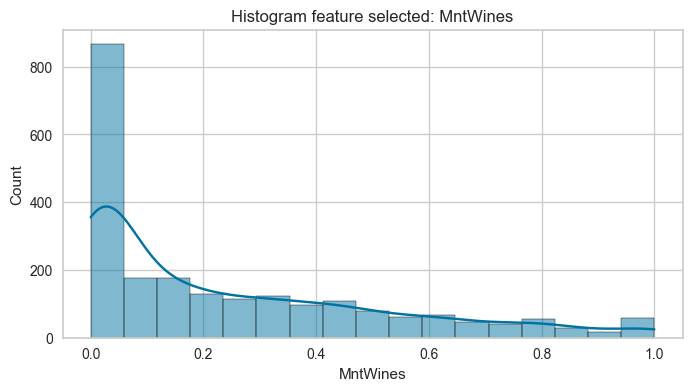

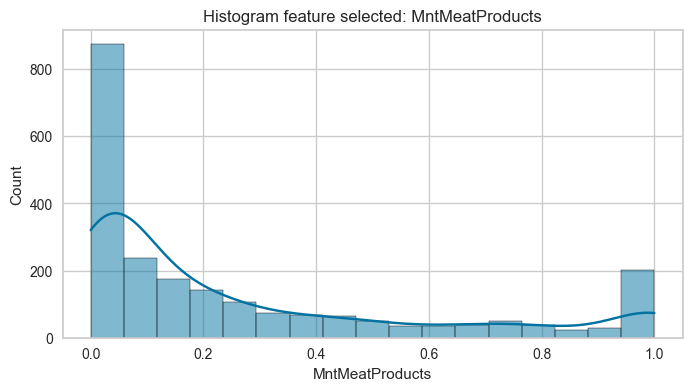

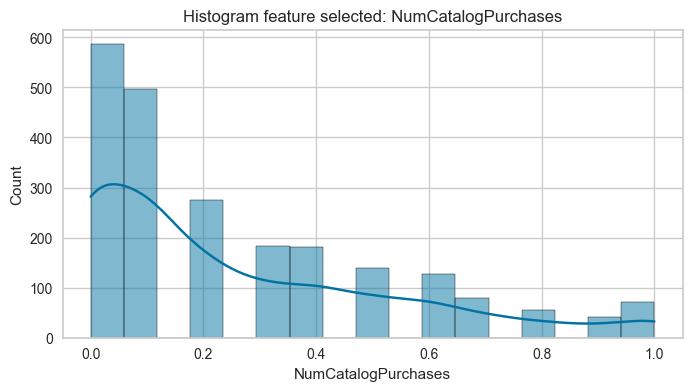

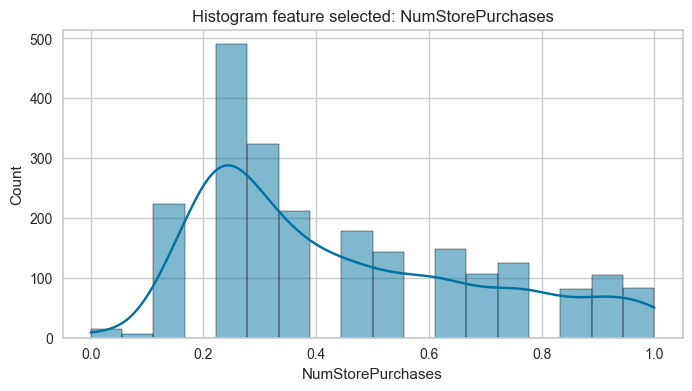

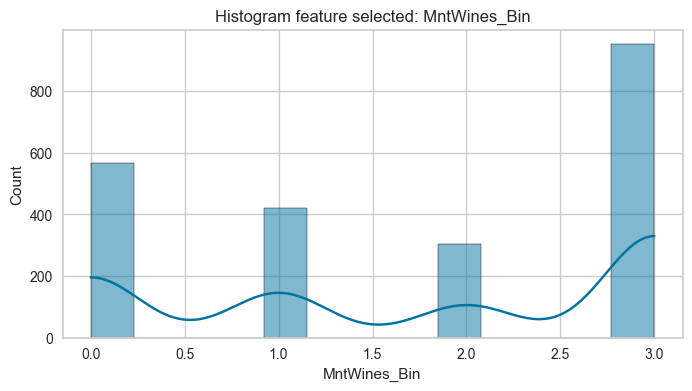

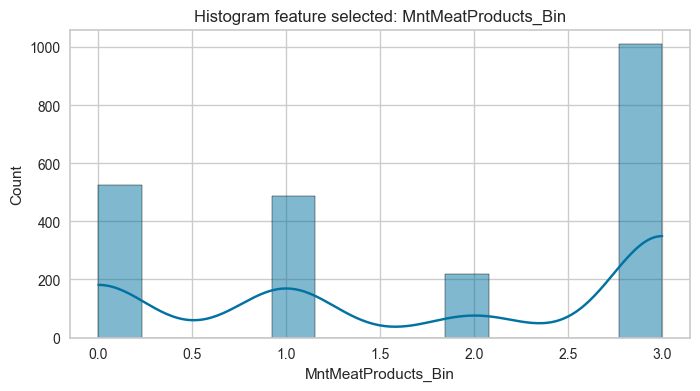

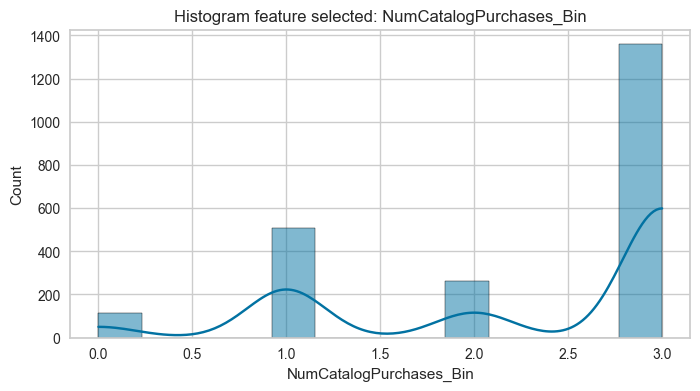

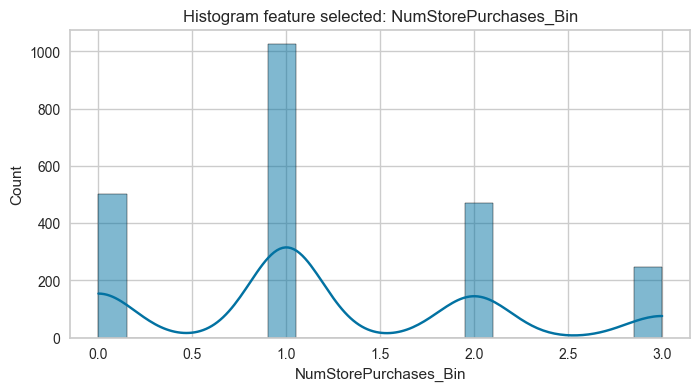

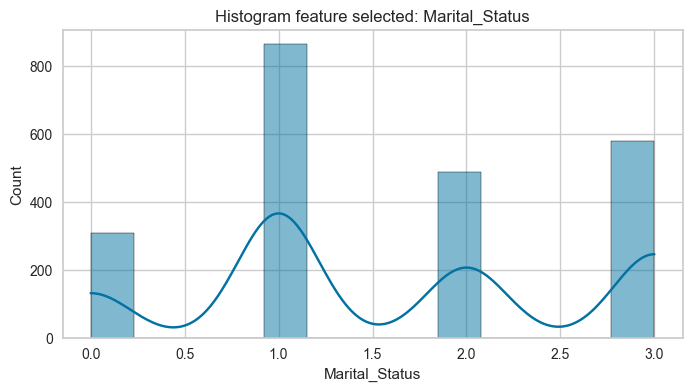

In [265]:
for feature in mc_preprocessed.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(mc_preprocessed[feature], kde=True)
    plt.title(f'Histogram feature selected: {feature}')
    plt.show()

In [266]:
mc_df_transformed = mc_preprocessed.copy()
skewness_values = mc_preprocessed.skew()

skewness_values

MntWines                   1.096611
MntMeatProducts            1.213585
NumCatalogPurchases        1.071866
NumStorePurchases          0.702237
MntWines_Bin              -0.270548
MntMeatProducts_Bin       -0.277090
NumCatalogPurchases_Bin   -0.907254
NumStorePurchases_Bin      0.454743
Marital_Status             0.080276
dtype: float64

In [267]:
# Fitur yang masih skewed
skewed_features = ['MntWines', 'MntMeatProducts', 'NumCatalogPurchases']

# Gunakan Yeo-Johnson (bisa menangani data negatif & nol)
pt = PowerTransformer(method='yeo-johnson')
mc_df_transformed[skewed_features] = pt.fit_transform(mc_df_transformed[skewed_features])

# Cek skewness setelah transformasi
print(mc_df_transformed.skew())

MntWines                   0.279872
MntMeatProducts            0.403345
NumCatalogPurchases        0.207073
NumStorePurchases          0.702237
MntWines_Bin              -0.270548
MntMeatProducts_Bin       -0.277090
NumCatalogPurchases_Bin   -0.907254
NumStorePurchases_Bin      0.454743
Marital_Status             0.080276
dtype: float64


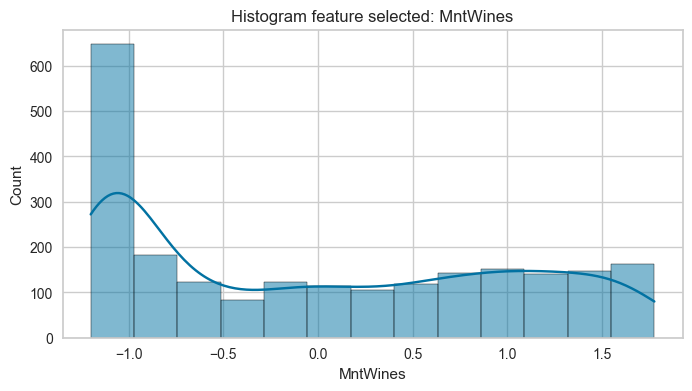

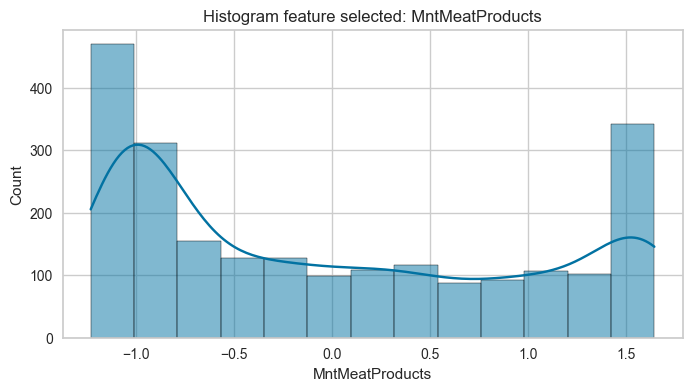

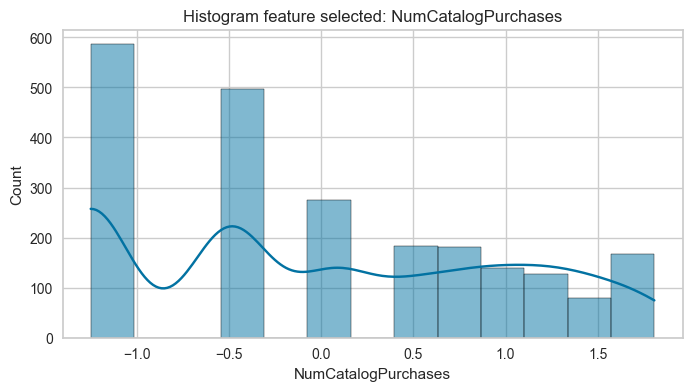

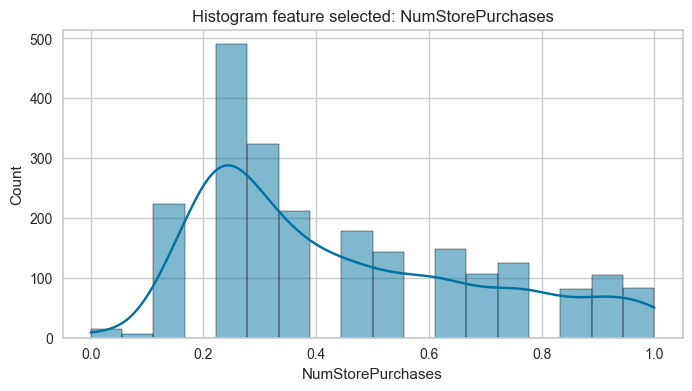

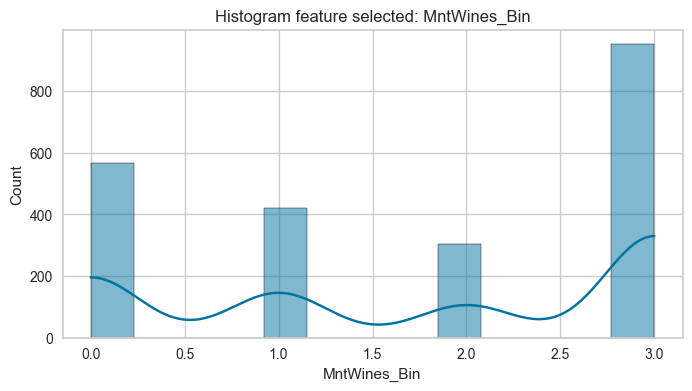

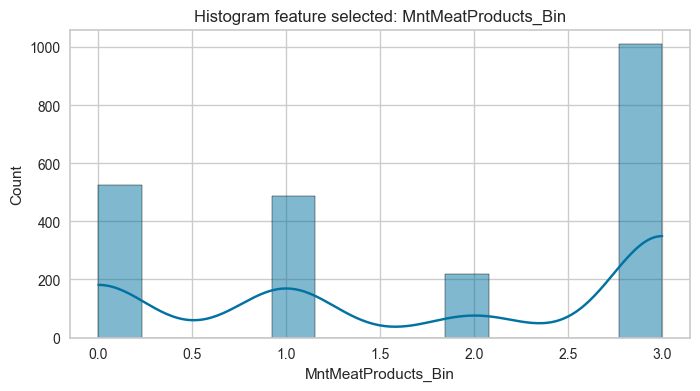

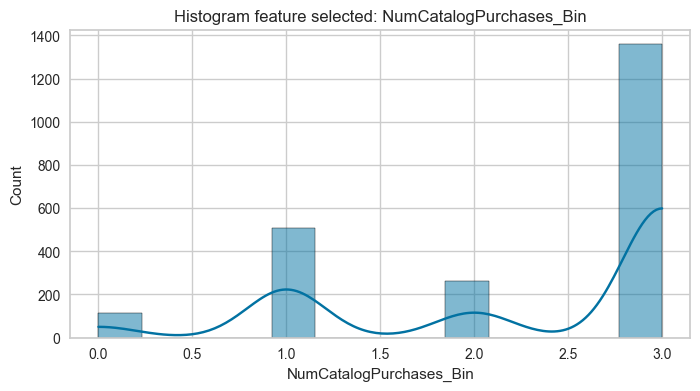

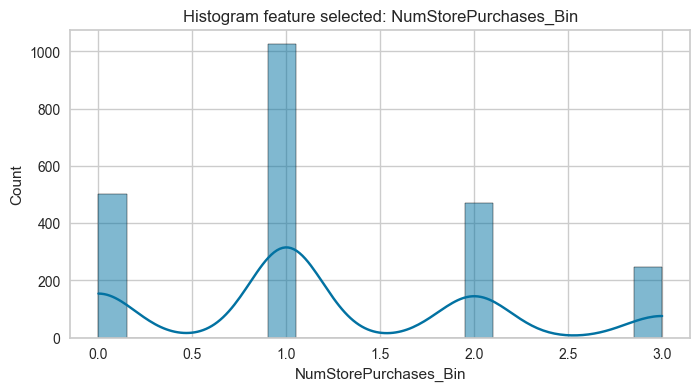

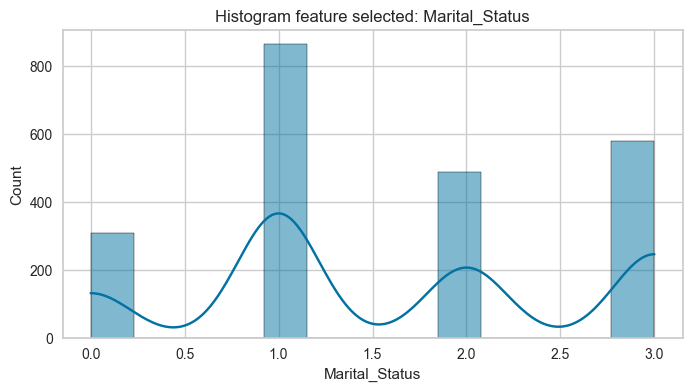

In [268]:
for feature in mc_df_transformed.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(mc_df_transformed[feature], kde=True)
    plt.title(f'Histogram feature selected: {feature}')
    plt.show()

In [269]:
mc_df_transformed.describe()

MntWines  MntMeatProducts  NumCatalogPurchases  NumStorePurchases  \
count  2.240000e+03     2.240000e+03         2.240000e+03        2240.000000   
mean  -1.665335e-17     4.282289e-17        -4.123686e-17           0.445398   
std    1.000223e+00     1.000223e+00         1.000223e+00           0.250074   
min   -1.199555e+00    -1.231639e+00        -1.249485e+00           0.000000   
25%   -1.019489e+00    -9.467810e-01        -1.249485e+00           0.230769   
50%   -1.311648e-01    -2.331476e-01         6.740095e-02           0.384615   
75%    9.427544e-01     9.527544e-01         8.200582e-01           0.615385   
max    1.776196e+00     1.644019e+00         1.806572e+00           1.000000   

       MntWines_Bin  MntMeatProducts_Bin  NumCatalogPurchases_Bin  \
count   2240.000000          2240.000000              2240.000000   
mean       1.733482             1.765179                 2.279911   
std        1.245248             1.244996                 0.977984   
min        0.000000             0.000000                 0.000000   
25%        0.000000             1.000000                 1.000000   
50%        2.000000             2.000000                 3.000000   
75%        3.000000             3.000000                 3.000000   
max        3.000000             3.000000                 3.000000   

       NumStorePurchases_Bin  Marital_Status  
count            2240.000000     2240.000000  
mean                1.205357        1.597321  
std                 0.910348        1.017222  
min                 0.000000        0.000000  
25%                 1.000000        1.000000  
50%                 1.000000        1.000000  
75%                 2.000000        3.000000  
max                 3.000000        3.000000

In [270]:
mc_preprocessed.describe()

MntWines  MntMeatProducts  NumCatalogPurchases  NumStorePurchases  \
count  2240.000000      2240.000000          2240.000000        2240.000000   
mean      0.246623         0.271355             0.262411           0.445398   
std       0.270251         0.321613             0.273478           0.250074   
min       0.000000         0.000000             0.000000           0.000000   
25%       0.019388         0.028777             0.000000           0.230769   
50%       0.141633         0.120504             0.200000           0.384615   
75%       0.411633         0.417266             0.400000           0.615385   
max       1.000000         1.000000             1.000000           1.000000   

       MntWines_Bin  MntMeatProducts_Bin  NumCatalogPurchases_Bin  \
count   2240.000000          2240.000000              2240.000000   
mean       1.733482             1.765179                 2.279911   
std        1.245248             1.244996                 0.977984   
min        0.000000             0.000000                 0.000000   
25%        0.000000             1.000000                 1.000000   
50%        2.000000             2.000000                 3.000000   
75%        3.000000             3.000000                 3.000000   
max        3.000000             3.000000                 3.000000   

       NumStorePurchases_Bin  Marital_Status  
count            2240.000000     2240.000000  
mean                1.205357        1.597321  
std                 0.910348        1.017222  
min                 0.000000        0.000000  
25%                 1.000000        1.000000  
50%                 1.000000        1.000000  
75%                 2.000000        3.000000  
max                 3.000000        3.000000

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [271]:
df_final = mc_df_transformed.copy()

In [272]:
df_final.head()

MntWines  MntMeatProducts  NumCatalogPurchases  NumStorePurchases  \
0  1.188535         1.634095             1.806572           0.307692   
1 -1.114538        -1.120739            -0.492215           0.153846   
2  0.758912         0.341527             0.067401           0.769231   
3 -1.114538        -0.880774            -1.249485           0.307692   
4 -0.133554         0.268929             0.491577           0.461538   

   MntWines_Bin  MntMeatProducts_Bin  NumCatalogPurchases_Bin  \
0             0                    0                        0   
1             3                    3                        3   
2             2                    1                        3   
3             3                    3                        3   
4             1                    1                        1   

   NumStorePurchases_Bin  Marital_Status  
0                      1               2  
1                      3               2  
2                      0               3  
3                      1               3  
4                      2               1

In [273]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MntWines                 2240 non-null   float64
 1   MntMeatProducts          2240 non-null   float64
 2   NumCatalogPurchases      2240 non-null   float64
 3   NumStorePurchases        2240 non-null   float64
 4   MntWines_Bin             2240 non-null   int64  
 5   MntMeatProducts_Bin      2240 non-null   int64  
 6   NumCatalogPurchases_Bin  2240 non-null   int64  
 7   NumStorePurchases_Bin    2240 non-null   int64  
 8   Marital_Status           2240 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 157.6 KB


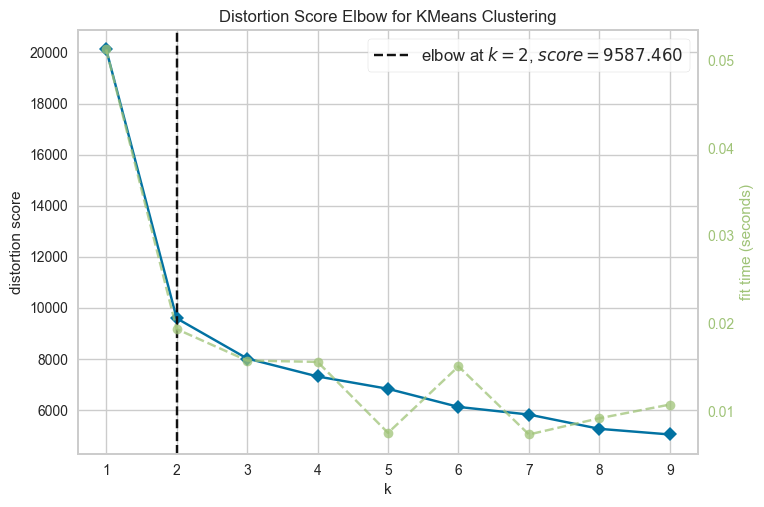

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [274]:
# Inisialisasi model KMeans
kmeans = KMeans()

# Visualisasi Elbow Method untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_final)
visualizer.show()

In [275]:
optimal_k = 2 # Jumlah cluster yang dipilih

# Inisialisasi K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=0)

# Latih model dengan data
kmeans.fit_predict(df_final)

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [276]:
labels = kmeans.labels_

In [277]:
# Simpan hasil clustering ke dalam DataFrame
mc_df_clusters = pd.DataFrame(df_final, columns=selected_features)  # Tambahkan kembali nama kolom
df_final["Cluster"] = labels

# Tampilkan distribusi jumlah data dalam setiap cluster
print(df_final["Cluster"].value_counts())

Cluster
1    1164
0    1076
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [278]:
silhouette_avg = silhouette_score(df_final, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.4537


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [279]:
# Pilih top 8 fitur berdasarkan Mutual Information
selector = SelectKBest(score_func=mutual_info_classif)
df_selected_mi = selector.fit_transform(df_final, labels)

# Jalankan K-Means dengan fitur baru
kmeans_fs_mi = KMeans(n_clusters=optimal_k, random_state=0)
labels_fs_mi = kmeans_fs_mi.fit_predict(df_selected_mi)

# Hitung silhouette score
silhouette_fs_mi = silhouette_score(df_selected_mi, labels_fs_mi)
print(f"Silhouette Score dengan Feature Selection (Mutual Info) + K-Means: {silhouette_fs_mi:.4f}")

Silhouette Score dengan Feature Selection (Mutual Info) + K-Means: 0.4537


In [280]:
from sklearn.ensemble import RandomForestClassifier

# Buat model Random Forest untuk seleksi fitur
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(df_final, labels)

# Ambil fitur dengan pentingnya tertinggi
importances = rf.feature_importances_
selected_features = df_final.columns[importances.argsort()[-8:]]  # Ambil 8 fitur terbaik

# Subset data dengan fitur yang terpilih
df_selected_rf = df_final[selected_features]

# Jalankan K-Means dengan fitur terpilih
kmeans_fs_rf = KMeans(n_clusters=optimal_k, random_state=0)
labels_fs_rf = kmeans_fs_rf.fit_predict(df_selected_rf)

# Hitung silhouette score
silhouette_fs_rf = silhouette_score(df_selected_rf, labels_fs_rf)
print(f"Silhouette Score dengan Feature Selection (Random Forest) + K-Means: {silhouette_fs_rf:.4f}")


Silhouette Score dengan Feature Selection (Random Forest) + K-Means: 0.5729


In [281]:
#RF dengan DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_selected_rf)

# Hitung silhouette score
silhouette_dbscan = silhouette_score(df_selected_rf, dbscan_labels)
print(f"Silhouette Score dengan DBSCAN: {silhouette_dbscan:.4f}")

Silhouette Score dengan DBSCAN: 0.6277


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

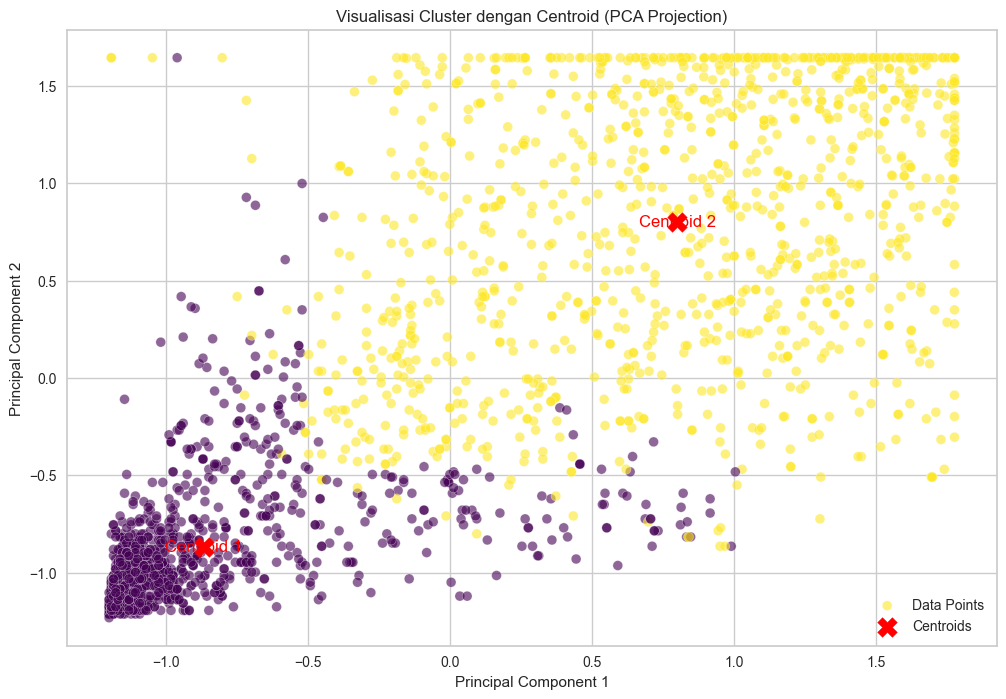

In [282]:
# Ambil centroid dari clustering dalam PCA space
centroids = kmeans.cluster_centers_

# Buat scatter plot hasil clustering
plt.figure(figsize=(12, 8))

# Plot data cluster dalam PCA space
plt.scatter(df_final.iloc[:, 0], df_final.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label="Data Points")

# Plot centroid dalam PCA space
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Cluster dengan Centroid (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()


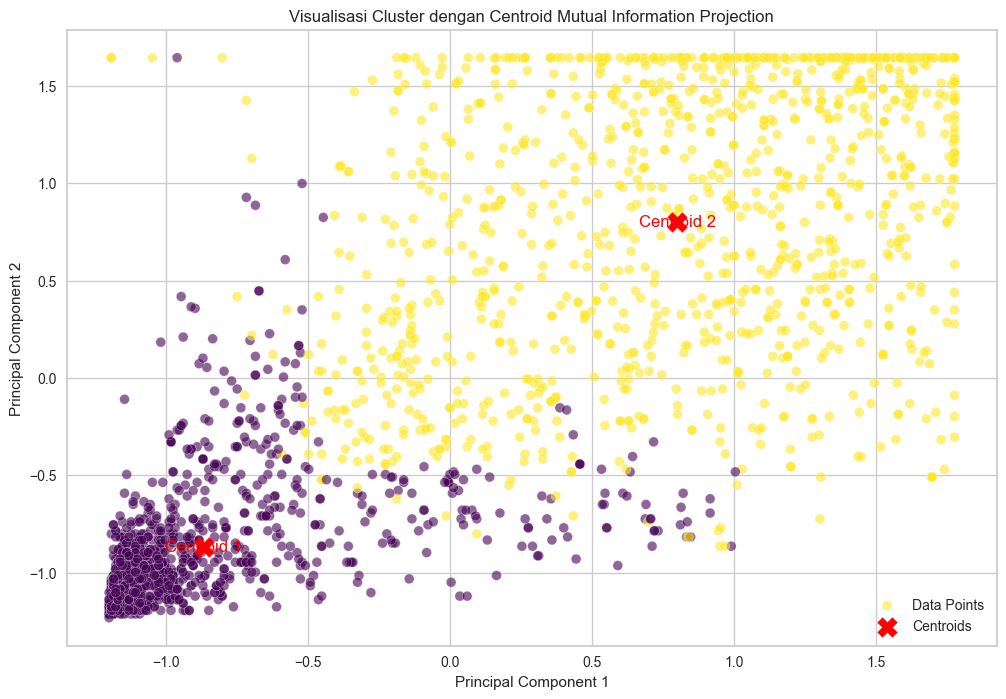

In [283]:
# Ambil centroid dari clustering dalam PCA space
centroids = kmeans_fs_mi.cluster_centers_

# Buat scatter plot hasil clustering
plt.figure(figsize=(12, 8))

# Plot data cluster dalam PCA space
plt.scatter(df_selected_mi[:, 0], df_selected_mi[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label="Data Points")

# Plot centroid dalam PCA space
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Cluster dengan Centroid Mutual Information Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()


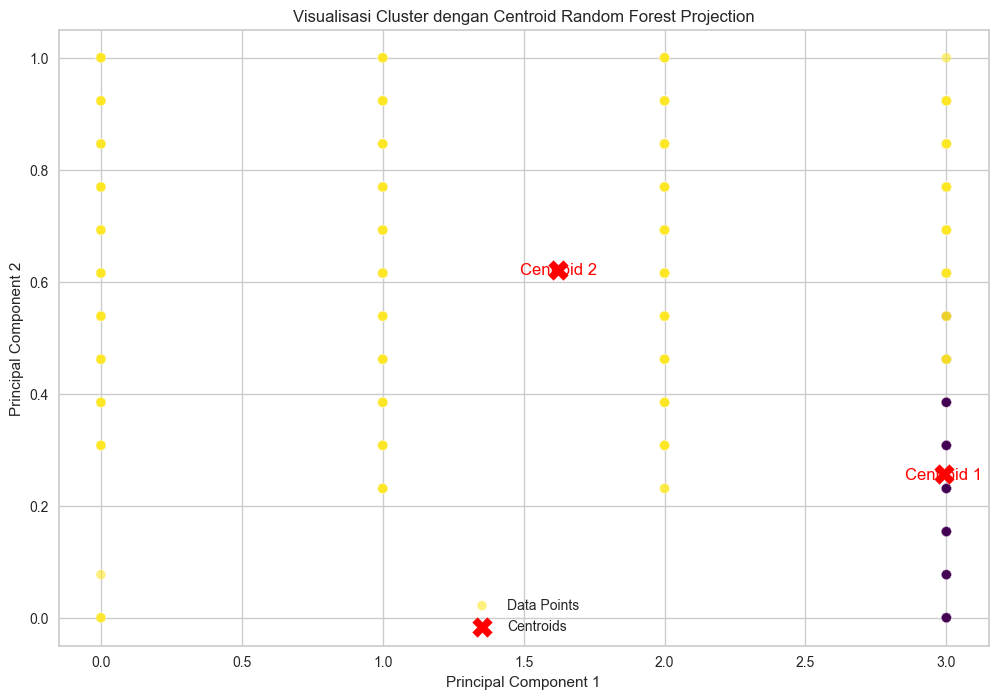

In [284]:
# Ambil centroid dari clustering dalam PCA space
centroids = kmeans_fs_rf.cluster_centers_

# Buat scatter plot hasil clustering
plt.figure(figsize=(12, 8))

# Plot data cluster dalam PCA space
plt.scatter(df_selected_rf.iloc[:, 0], df_selected_rf.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label="Data Points")

# Plot centroid dalam PCA space
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Tambahkan label centroid
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label sumbu
plt.title('Visualisasi Cluster dengan Centroid Random Forest Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [243]:
# Pastikan centroid adalah array 2D
centroide = np.atleast_2d(kmeans.cluster_centers_)  # Convert ke 2D jika masih 1D

# Pastikan feature_names jumlahnya sama dengan dimensi centroid
feature_names = df_final.columns  # Pastikan mengambil fitur yang digunakan

# Loop untuk tiap centroid
for i, centroid in enumerate(centroids):
    print(f"\nCentroid {i+1}:")
    
    # Pastikan centroid bisa diiterasi
    for feature, value in zip(feature_names, centroid):
        print(f"  {feature} = {value:.2f}")


Centroid 1:
  MntWines = 0.27
  MntMeatProducts = 2.98
  NumCatalogPurchases = 0.06
  NumStorePurchases = 2.73
  MntWines_Bin = 0.05
  MntMeatProducts_Bin = 2.77
  NumCatalogPurchases_Bin = 0.05
  NumStorePurchases_Bin = 0.00

Centroid 2:
  MntWines = 0.62
  MntMeatProducts = 1.57
  NumCatalogPurchases = 0.47
  NumStorePurchases = 0.72
  MntWines_Bin = 0.44
  MntMeatProducts_Bin = 0.74
  NumCatalogPurchases_Bin = 0.50
  NumStorePurchases_Bin = 1.00


In [244]:
# Pastikan centroid adalah array 2D
centroide = np.atleast_2d(kmeans_fs_mi.cluster_centers_)  # Convert ke 2D jika masih 1D

# Pastikan feature_names jumlahnya sama dengan dimensi centroid
feature_names = df_final.columns  # Pastikan mengambil fitur yang digunakan

# Loop untuk tiap centroid
for i, centroid in enumerate(centroids):
    print(f"\nCentroid {i+1}:")
    
    # Pastikan centroid bisa diiterasi
    for feature, value in zip(feature_names, centroid):
        print(f"  {feature} = {value:.2f}")


Centroid 1:
  MntWines = 0.27
  MntMeatProducts = 2.98
  NumCatalogPurchases = 0.06
  NumStorePurchases = 2.73
  MntWines_Bin = 0.05
  MntMeatProducts_Bin = 2.77
  NumCatalogPurchases_Bin = 0.05
  NumStorePurchases_Bin = 0.00

Centroid 2:
  MntWines = 0.62
  MntMeatProducts = 1.57
  NumCatalogPurchases = 0.47
  NumStorePurchases = 0.72
  MntWines_Bin = 0.44
  MntMeatProducts_Bin = 0.74
  NumCatalogPurchases_Bin = 0.50
  NumStorePurchases_Bin = 1.00


In [245]:
# Pastikan centroid adalah array 2D
centroide = np.atleast_2d(kmeans_fs_rf.cluster_centers_)  # Convert ke 2D jika masih 1D

# Pastikan feature_names jumlahnya sama dengan dimensi centroid
feature_names = df_final.columns  # Pastikan mengambil fitur yang digunakan

# Loop untuk tiap centroid
for i, centroid in enumerate(centroids):
    print(f"\nCentroid {i+1}:")
    
    # Pastikan centroid bisa diiterasi
    for feature, value in zip(feature_names, centroid):
        print(f"  {feature} = {value:.2f}")


Centroid 1:
  MntWines = 0.27
  MntMeatProducts = 2.98
  NumCatalogPurchases = 0.06
  NumStorePurchases = 2.73
  MntWines_Bin = 0.05
  MntMeatProducts_Bin = 2.77
  NumCatalogPurchases_Bin = 0.05
  NumStorePurchases_Bin = 0.00

Centroid 2:
  MntWines = 0.62
  MntMeatProducts = 1.57
  NumCatalogPurchases = 0.47
  NumStorePurchases = 0.72
  MntWines_Bin = 0.44
  MntMeatProducts_Bin = 0.74
  NumCatalogPurchases_Bin = 0.50
  NumStorePurchases_Bin = 1.00


## **1. Cluster 1 (Kelompok Berpendapatan Rendah dan Konsumsi Moderat)**
- **Rata-rata Income:** 0.27  
- **Rata-rata Pengeluaran:**
  - **MntFruits:** 0.24  
  - **MntFishProducts:** 0.26  
  - **MntMeatProducts:** 0.40  
- **Frekuensi Pembelian:**
  - **NumCatalogPurchases:** 0.10  
  - **NumStorePurchases:** 0.23  
  - **NumWebPurchases:** 0.15
### **Analisis:**  
Pelanggan dalam cluster ini memiliki pendapatan yang relatif rendah dibandingkan dengan cluster lainnya. Mereka memiliki pola pengeluaran yang lebih kecil di semua kategori produk, terutama pada pembelian melalui katalog. Mereka kemungkinan besar merupakan pelanggan dengan daya beli yang terbatas dan lebih berhati-hati dalam pengeluaran mereka.

---
## **2. Cluster 2: (Kelompok Berpendapatan Tinggi dan Pengeluaran Besar)**
- **Rata-rata Income:** 0.60  
- **Rata-rata Pengeluaran:**
  - **MntFruits:** 0.85  
  - **MntFishProducts:** 0.86  
  - **MntMeatProducts:** 0.89  
- **Frekuensi Pembelian:**
  - **NumCatalogPurchases:** 0.73  
  - **NumStorePurchases:** 0.66  
  - **NumWebPurchases:** 0.46

  ### **Analisis:**  
Cluster ini mencerminkan pelanggan dengan pendapatan yang lebih tinggi dan kecenderungan untuk berbelanja dalam jumlah besar, terutama pada kategori makanan (**fruits, fish, meat**). Mereka juga lebih aktif dalam melakukan pembelian melalui katalog dan toko fisik, menunjukkan pola konsumsi yang lebih agresif. Pelanggan ini kemungkinan merupakan kelompok premium dengan daya beli yang kuat.

---
## **3. Cluster 3 (Kelompok Berpendapatan Sedang dan Konsumsi Seimbang)**
- **Rata-rata Income:** 0.45  
- **Rata-rata Pengeluaran:**
  - **MntFruits:** 0.41  
  - **MntFishProducts:** 0.44  
  - **MntMeatProducts:** 0.70  
- **Frekuensi Pembelian:**
  - **NumCatalogPurchases:** 0.47  
  - **NumStorePurchases:** 0.49  
  - **NumWebPurchases:** 0.45  

### **Analisis:**  
Pelanggan dalam cluster ini memiliki pendapatan sedang dengan pola konsumsi yang lebih seimbang dibandingkan dengan cluster lainnya. Mereka masih menghabiskan uang untuk berbagai kategori produk, terutama daging, namun tidak sebesar **Cluster 2**. Mereka juga lebih aktif dalam pembelian melalui berbagai saluran (**katalog, toko fisik, dan online**) dibandingkan **Cluster 1**. Cluster ini mencerminkan pelanggan dengan daya beli yang baik namun lebih selektif dalam pengeluaran mereka.

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [246]:
# Ambil nama fitur yang terpilih dari SelectKBest
selected_features = df_final.columns[rf.feature_importances_.argsort()[-8:]]

# Buat DataFrame baru dengan fitur yang dipilih
df_export = pd.DataFrame(df_selected_rf, columns=selected_features)

# Tambahkan label hasil clustering
df_export["Cluster"] = labels_fs_rf

# Simpan ke CSV
df_export.to_csv("clustered_data.csv", index=False)

print("File CSV berhasil diekspor!")

File CSV berhasil diekspor!


In [247]:
df_export.head()

NumStorePurchases  NumCatalogPurchases_Bin  NumCatalogPurchases  \
0           0.307692                        0                  1.0   
1           0.153846                        3                  0.1   
2           0.769231                        3                  0.2   
3           0.307692                        3                  0.0   
4           0.461538                        1                  0.3   

   MntWines_Bin  MntWines  MntMeatProducts_Bin  MntMeatProducts  Cluster  
0             0  0.518367                    0         0.982014        1  
1             3  0.008980                    3         0.010791        0  
2             2  0.347755                    1         0.228417        1  
3             3  0.008980                    3         0.035971        0  
4             1  0.141224                    1         0.212230        1